PROGRAM MENGOLAH DATA AWS

In [58]:
bulan='Januari 2023'

In [59]:
import pandas as dp
import numpy as np
import openpyxl
from datetime import datetime, timedelta
import math
import matplotlib.pyplot as plt

# Unggah file
df = dp.read_excel('C:/Users/Acer/Downloads/1. jan 2023.xlsx')

MENCARI DATA HILANG

In [69]:
df["Tanggal"] = dp.to_datetime(df["Tanggal"]).dt.strftime("%Y-%m-%d %H:%M:%S")
from datetime import datetime, timedelta
read=df
pro1=read['Tanggal'].values.tolist()

#Ditulis tanggal serta waktu mulai(misal 1 Januari 2022 pukul 00:00 maka ditulis menjadi (2022,1,1,0,0))
start_datetime = datetime(2023, 1, 1, 0, 0) #DIGANTI TANGGAL DAN WAKTU

# Menginisialisasi objek timedelta untuk selisih 10 menit
time_difference = timedelta(minutes=10)
datetime_list1 = []

#Iterasi waktu
current_datetime = start_datetime
#Ditulis tanggal serta waktu berhenti(misal 1 Februari 2022 pukul 23:50 maka ditulis menjadi (2022, 2, 1, 23, 50))
while current_datetime < datetime(2023, 2, 1, 0, 0): #DIGANTI TANGGAL DAN WAKTU
    datetime_str = current_datetime.strftime("%Y-%m-%d %H:%M:%S")
    datetime_list1.append(datetime_str)
    current_datetime += time_difference

res = [x for x in datetime_list1 if x not in pro1 or x not in datetime_list1]

if not res:
    print("Data AWS lengkap")
else:
    print("Data AWS tidak lengkap")

print("Daftar Data yang hilang:")
for item in res:
  print(item)
print('**************************************')
print("Banyak Data Hilang:")
print(len(res))

newDF= dp.DataFrame({'Tanggal': res,})
data = [df, newDF]
df2 = dp.concat(data)
df3=df2.sort_values(by='Tanggal')

# Menunjukkan baris duplikat dalam DataFrame
is_duplicate = df3['Tanggal'].duplicated()
print('**************************************')
print('**************************************')
print("Data duplicate:")
df3['Tanggal'][is_duplicate]

Data AWS tidak lengkap
Daftar Data yang hilang:
2023-01-12 00:00:00
2023-01-13 00:00:00
2023-01-14 00:00:00
2023-01-15 00:00:00
2023-01-16 00:00:00
2023-01-16 00:10:00
2023-01-17 00:00:00
2023-01-18 00:00:00
2023-01-19 00:00:00
2023-01-28 00:00:00
**************************************
Banyak Data Hilang:
10
**************************************
**************************************
Data duplicate:


Series([], Name: Tanggal, dtype: object)

In [71]:
#Menghapus baris duplikat
data_duplikat_indeks_list = df3.index[is_duplicate].tolist()
df3=df3.drop(data_duplikat_indeks_list)

df3.reset_index(drop=False, inplace=True)
#Menghapus kolom yang tidak perlu
df3=df3[df3.columns[~df3.columns.str.contains('flag')]]
#df4=df3.drop(df3.index[-1])

#Menambahkan arah mata angin
v=df3['wd_avg'].values.tolist()
l=[]
for i in v:
  if not math.isnan(i):
    if 22.5 <= i <= 67.5:
      l.append("NE")
    elif 67.5 <= i <= 112.5:
      l.append("E")
    elif 112.5<= i <= 157.5:
      l.append("SE")
    elif 157.5 <= i <=202.5:
      l.append("S")
    elif 202.5 <= i <=247.5:
      l.append("SW")
    elif 247.5 <= i <=292.5:
      l.append("W")
    elif 292.5 <= i <=337.5:
      l.append("NW")
    else :
      l.append("N")
  else :
    l.append(" ")
df3.insert(8, 'Arah_Mata_Angin', l)

Outliers



Persebaran Outlier



DAFTAR OUTLIER TA_meas_Avg:

Tidak ada Outlier

GRAFIK TA_meas_Avg



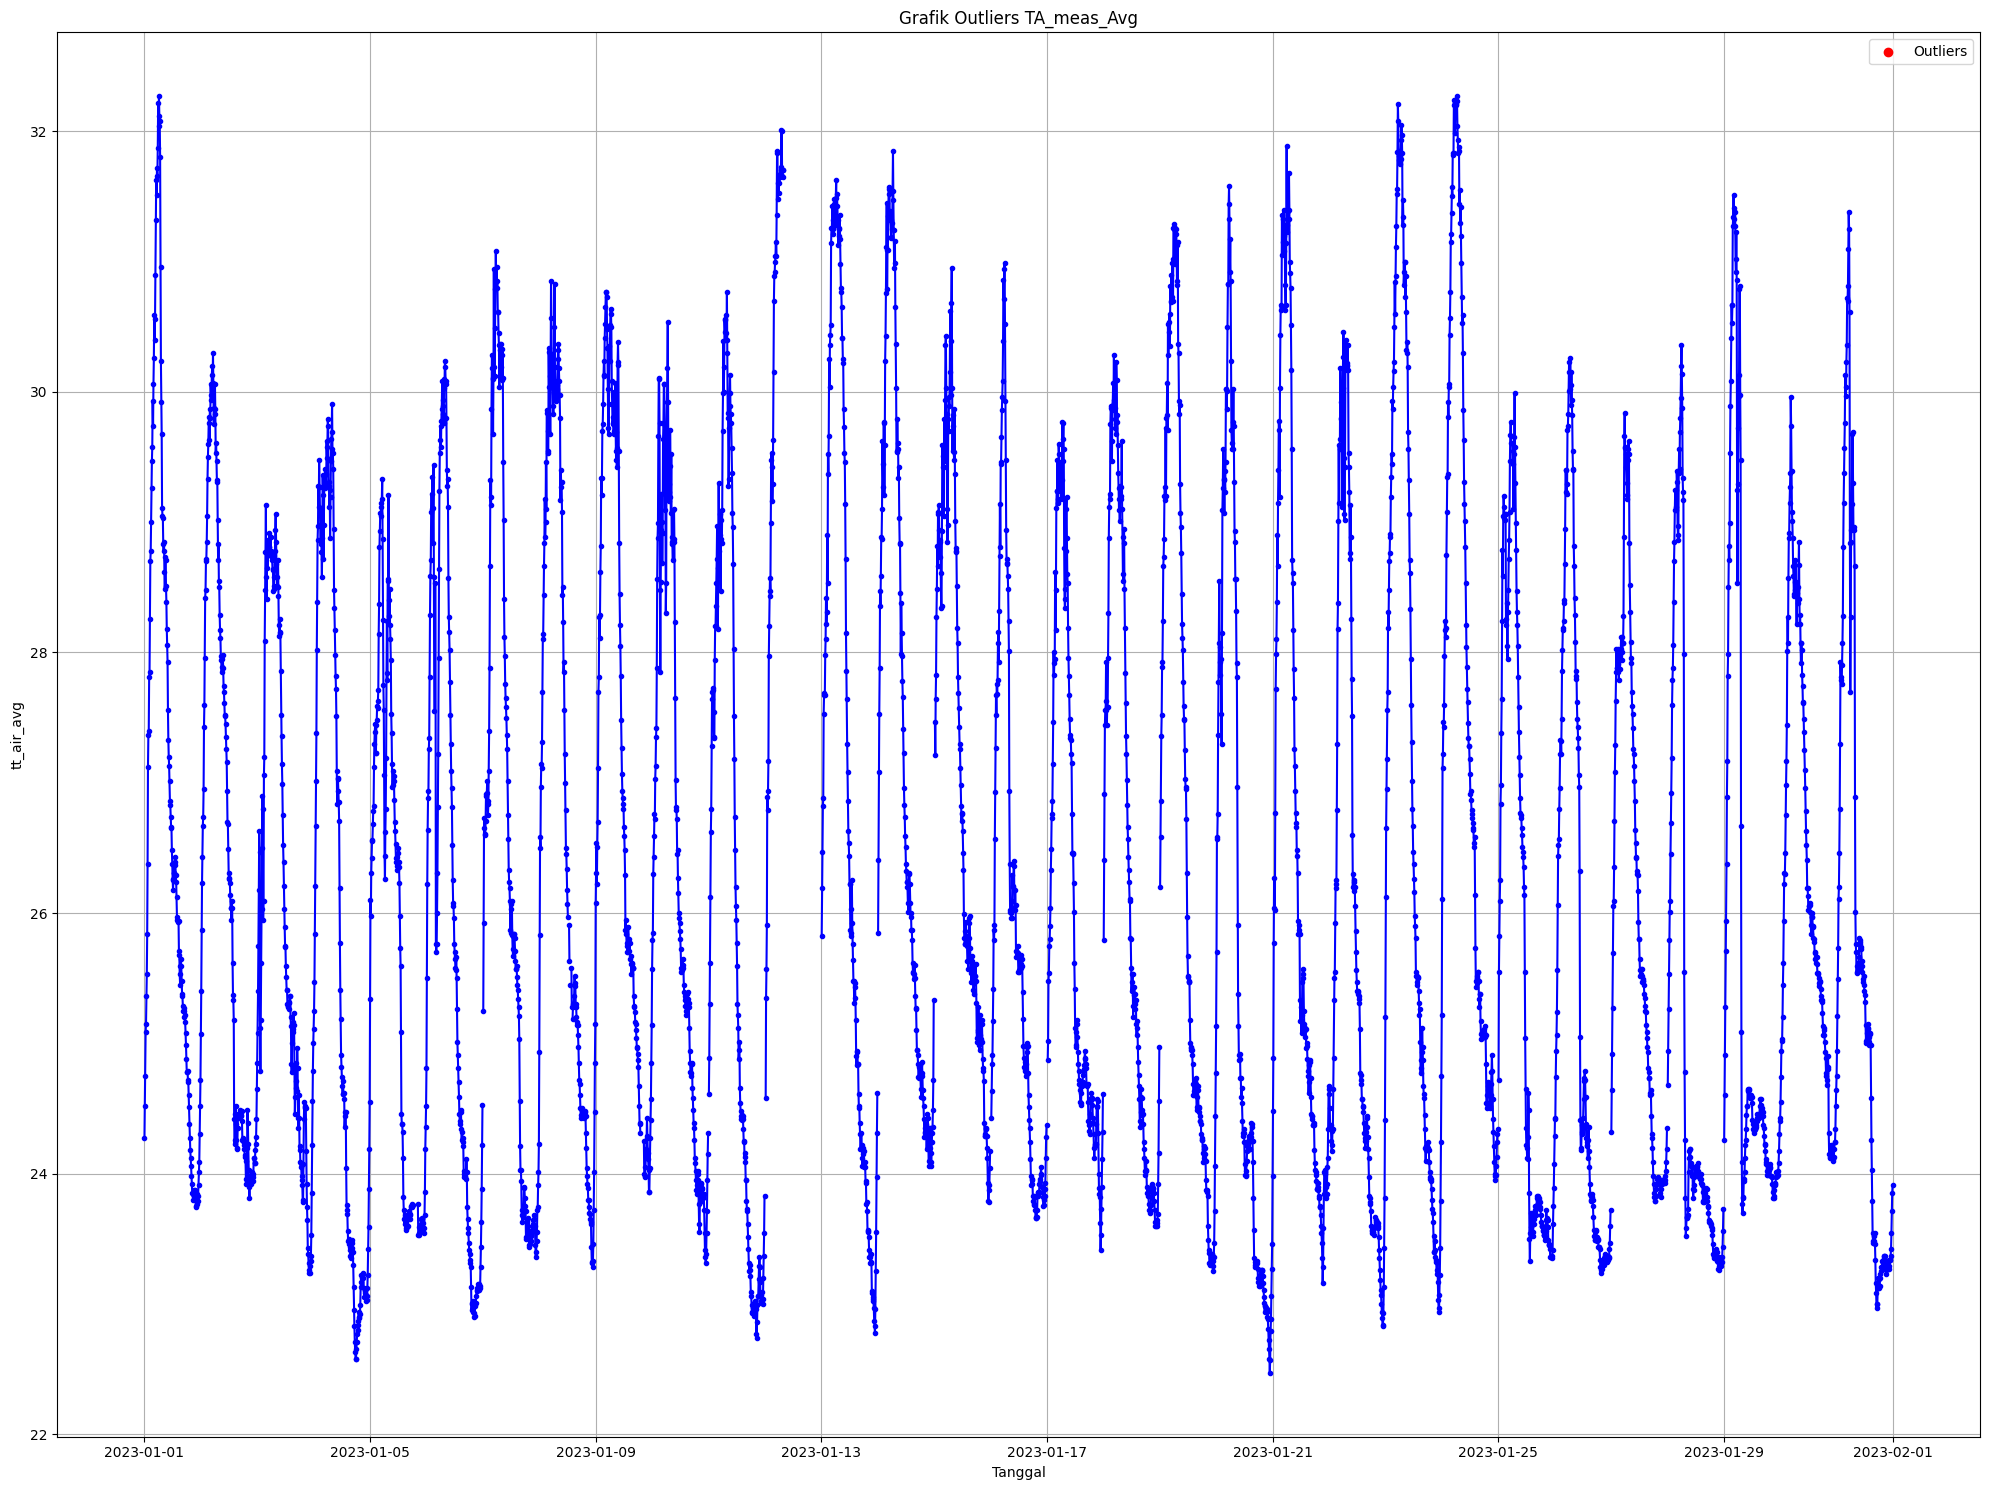


DAFTAR OUTLIER TA_meas_Max:

Outlier TA_meas_Max
2023-01-01 00:10:00 : 24.68
2023-01-01 00:20:00 : 25.0
2023-01-01 00:30:00 : 25.19
2023-01-01 00:40:00 : 25.27
2023-01-01 00:50:00 : 25.49
2023-01-01 01:00:00 : 25.79
2023-01-01 01:10:00 : 26.01
2023-01-01 01:20:00 : 26.78
2023-01-01 01:30:00 : 27.39
2023-01-01 01:40:00 : 27.53
2023-01-01 01:50:00 : 27.55
2023-01-02 00:10:00 : 25.69
2023-01-02 00:20:00 : 26.19
2023-01-02 00:30:00 : 26.46
2023-01-02 00:40:00 : 26.55
2023-01-02 00:50:00 : 26.89
2023-01-02 01:00:00 : 26.89
2023-01-02 01:10:00 : 27.11
2023-01-03 00:10:00 : 25.27
2023-01-03 00:20:00 : 25.58
2023-01-03 00:30:00 : 26.04
2023-01-03 00:40:00 : 26.41
2023-01-03 00:50:00 : 26.82
2023-01-03 01:00:00 : 26.85
2023-01-03 01:10:00 : 26.85
2023-01-03 01:20:00 : 26.85
2023-01-03 01:30:00 : 26.85
2023-01-03 01:40:00 : 26.85
2023-01-03 01:50:00 : 26.85
2023-01-03 02:00:00 : 26.85
2023-01-03 02:10:00 : 27.07
2023-01-03 02:20:00 : 27.07
2023-01-03 02:30:00 : 27.07
2023-01-03 02:40:00 : 27.07

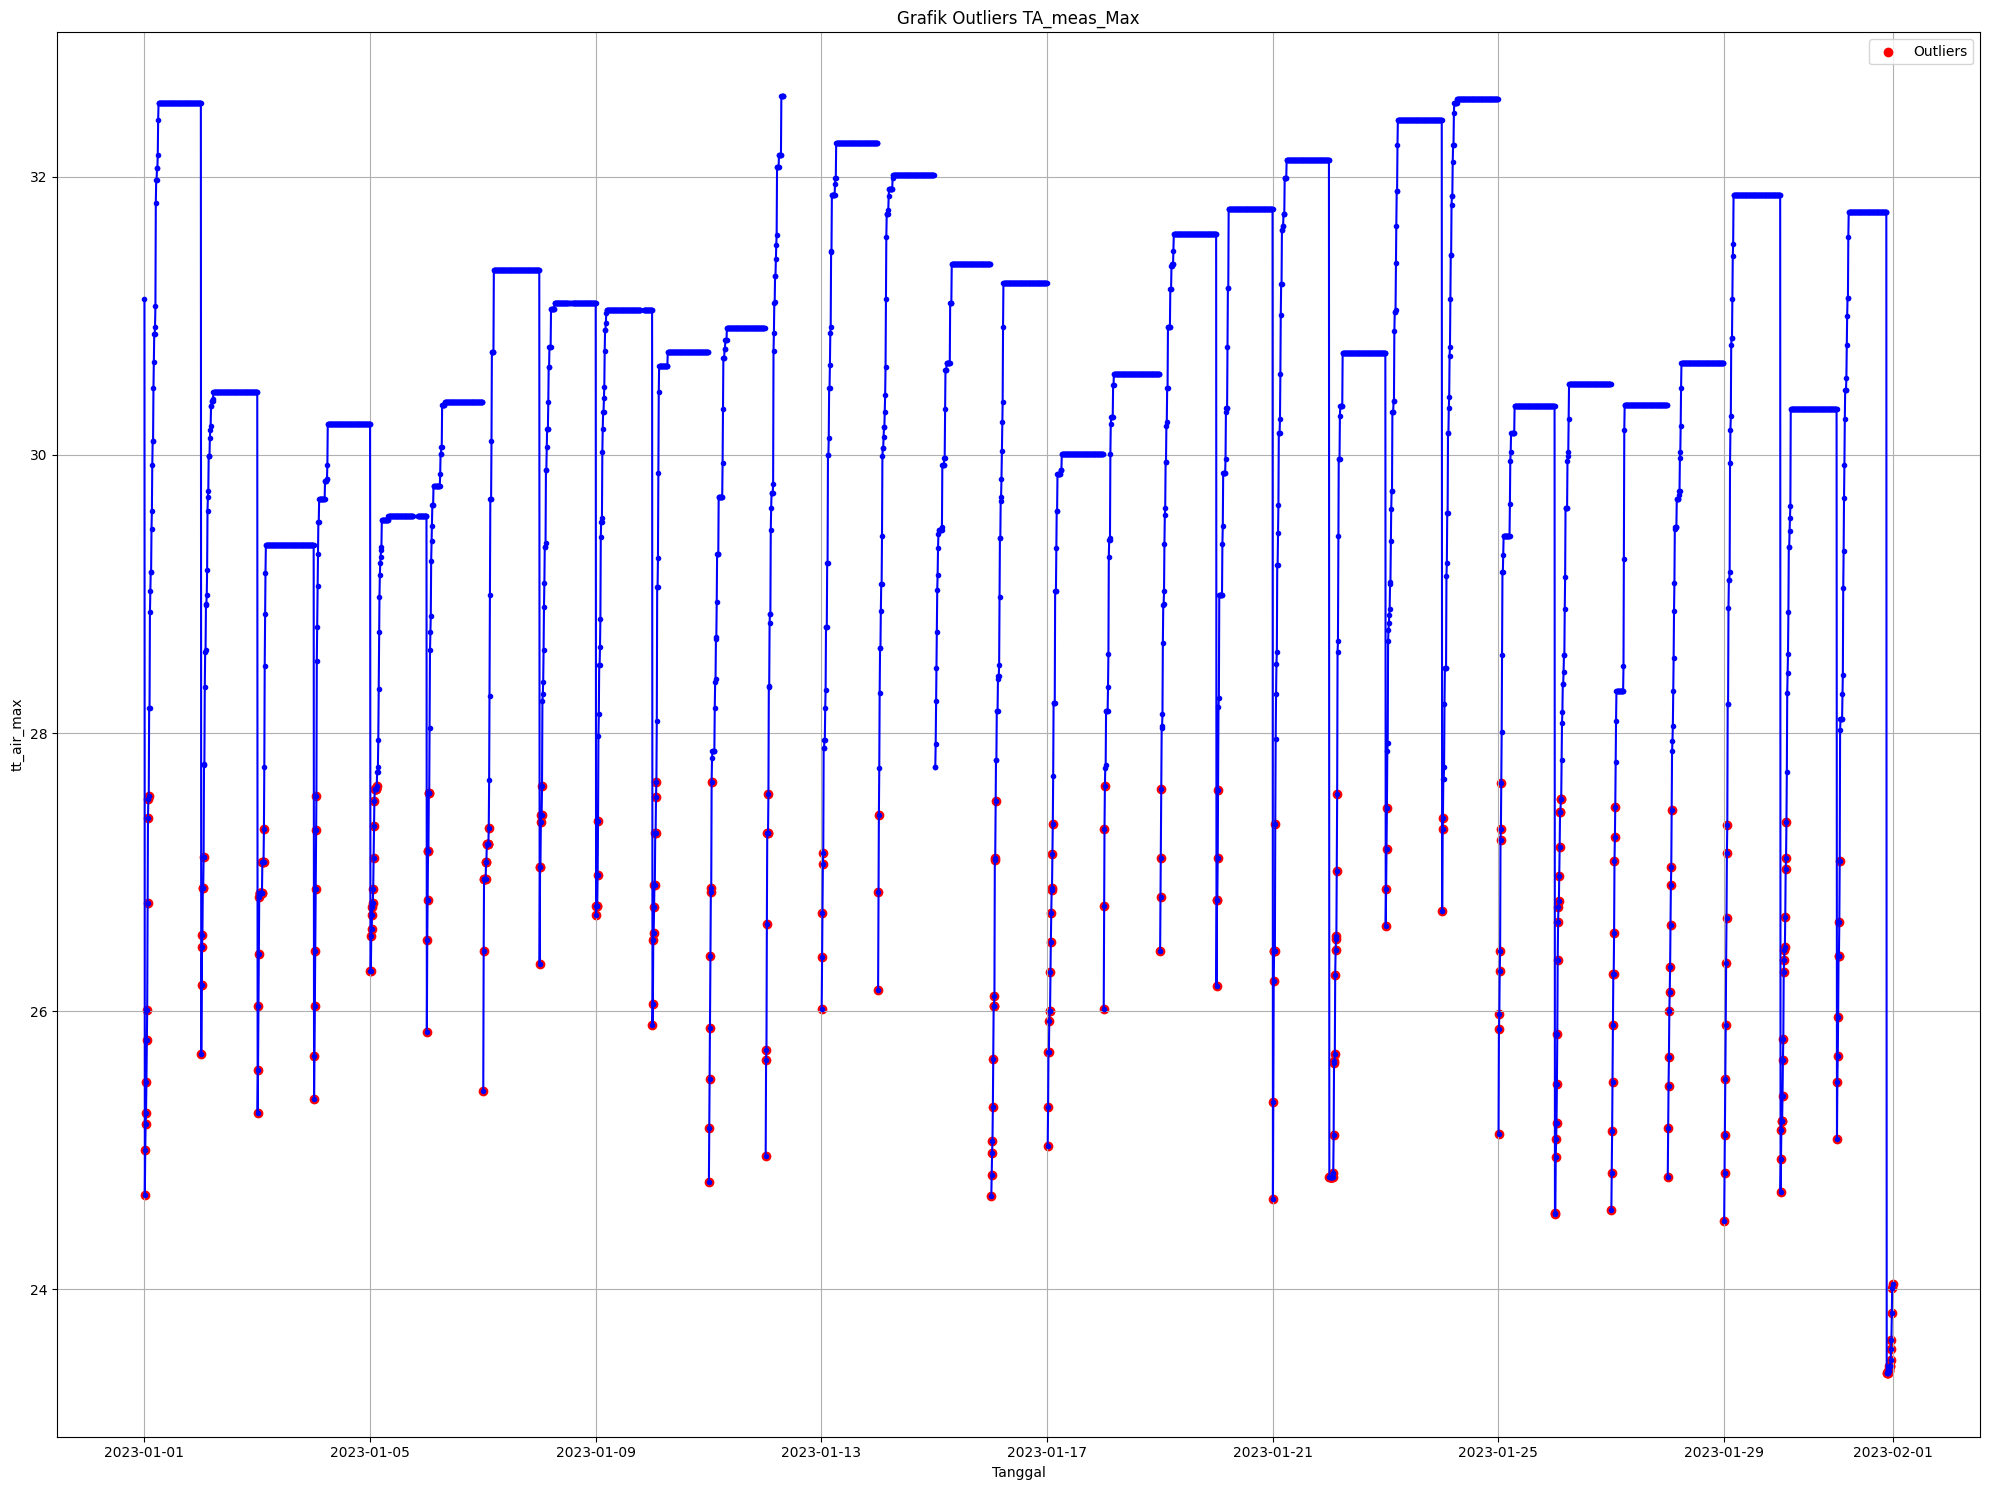


DAFTAR OUTLIER TA_meas_Min:

Tidak ada Outlier

GRAFIK TA_meas_Min



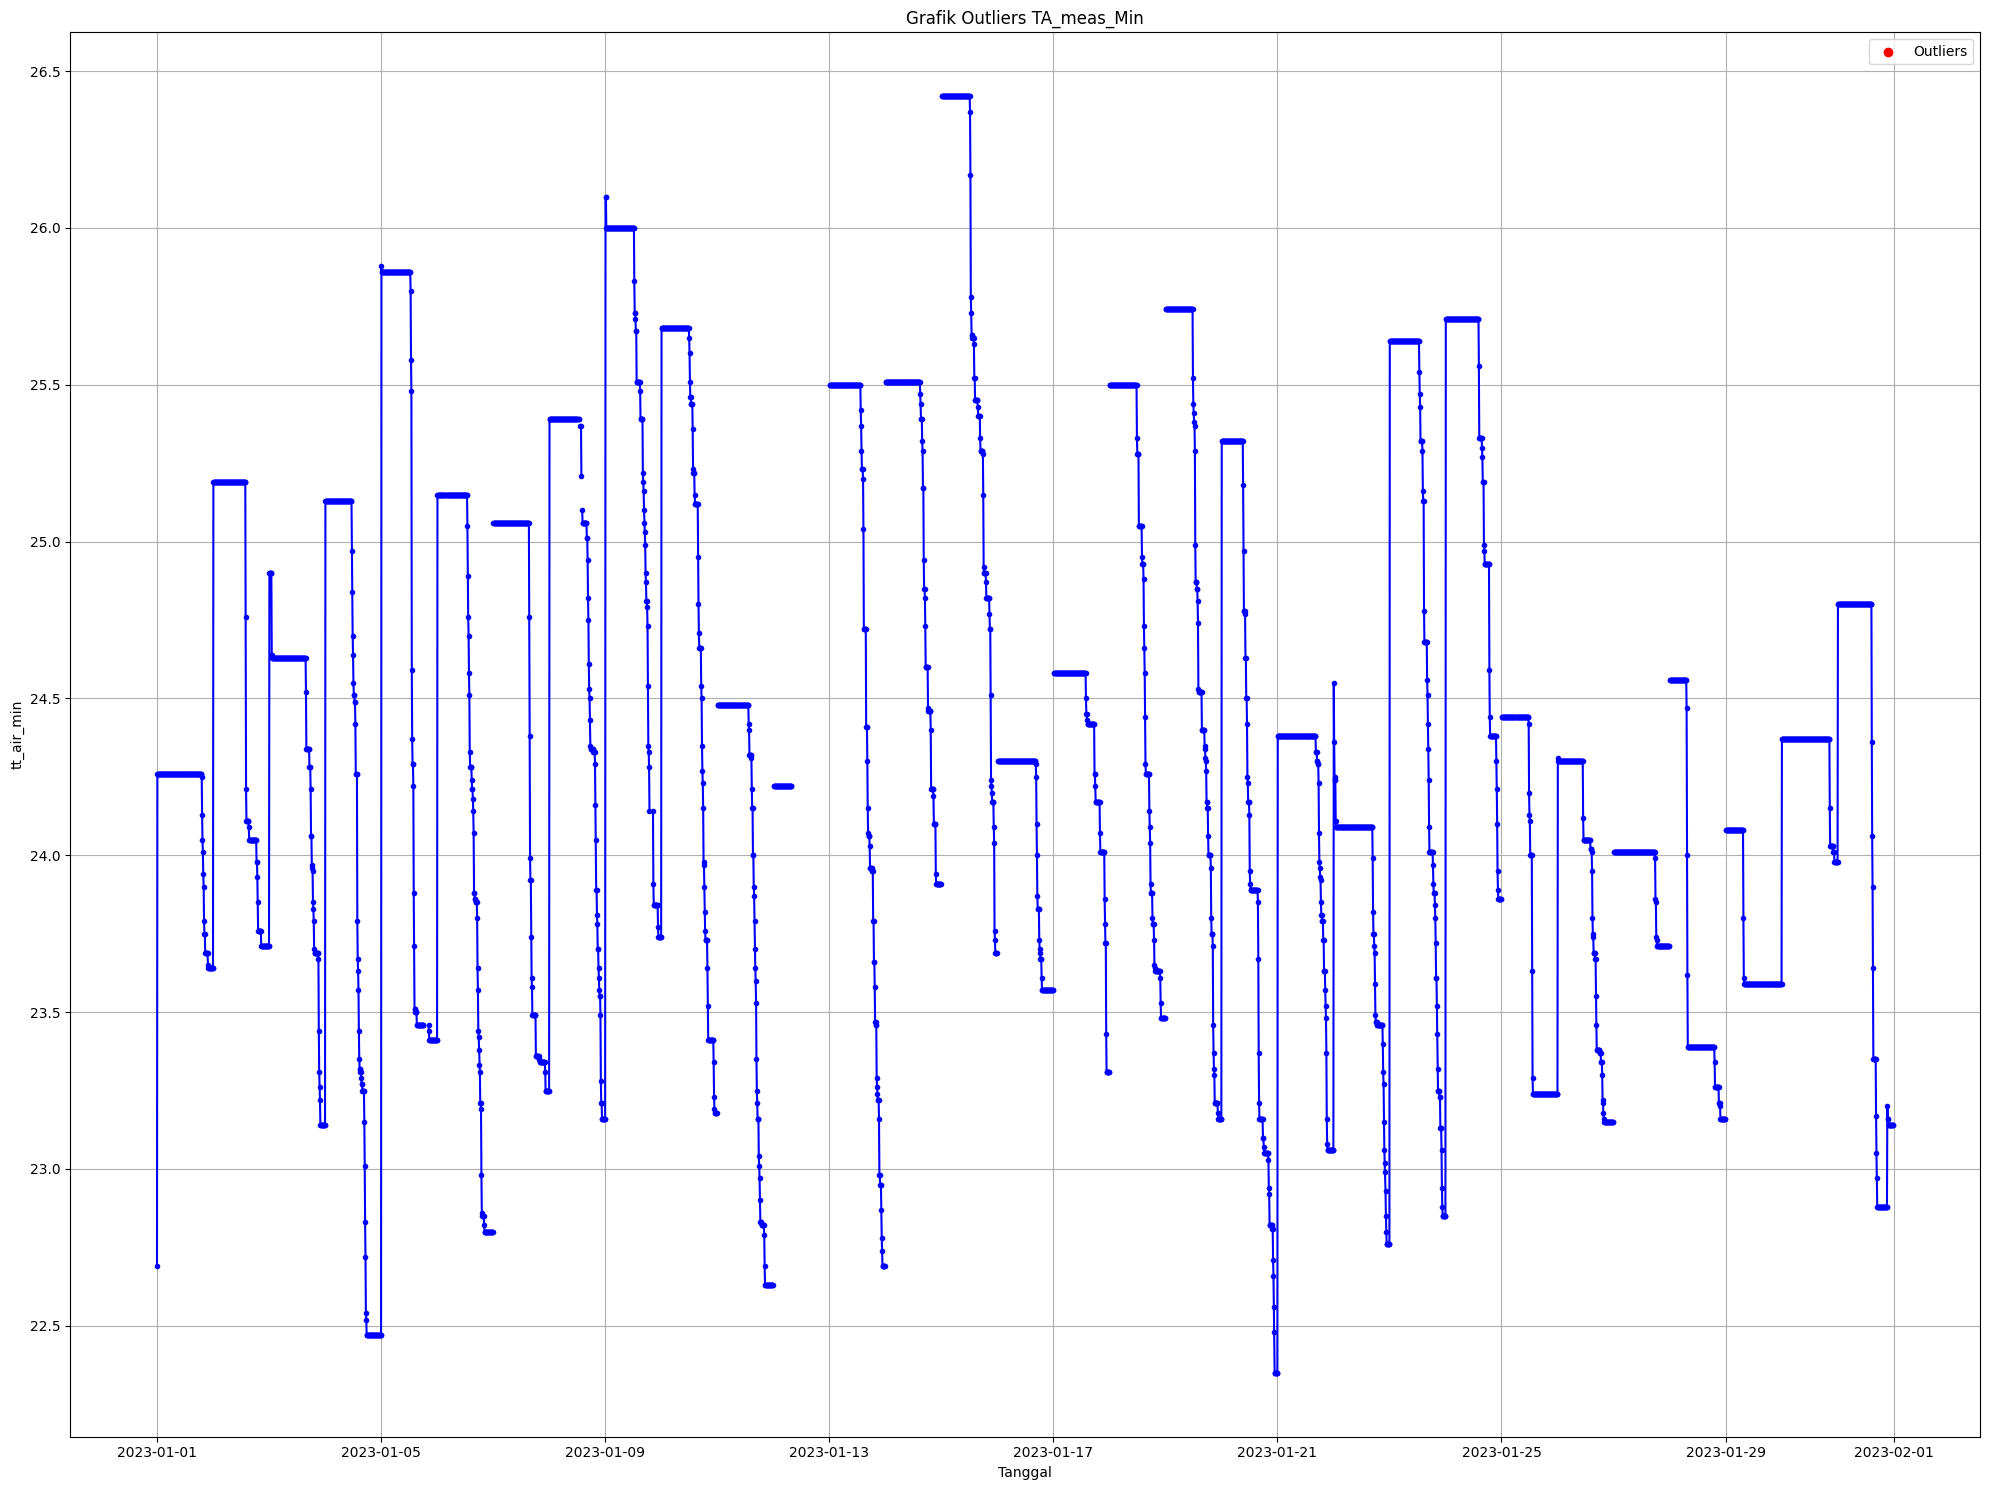


DAFTAR OUTLIER RH_meas_Avg:

Tidak ada Outlier

GRAFIK RH_meas_Avg



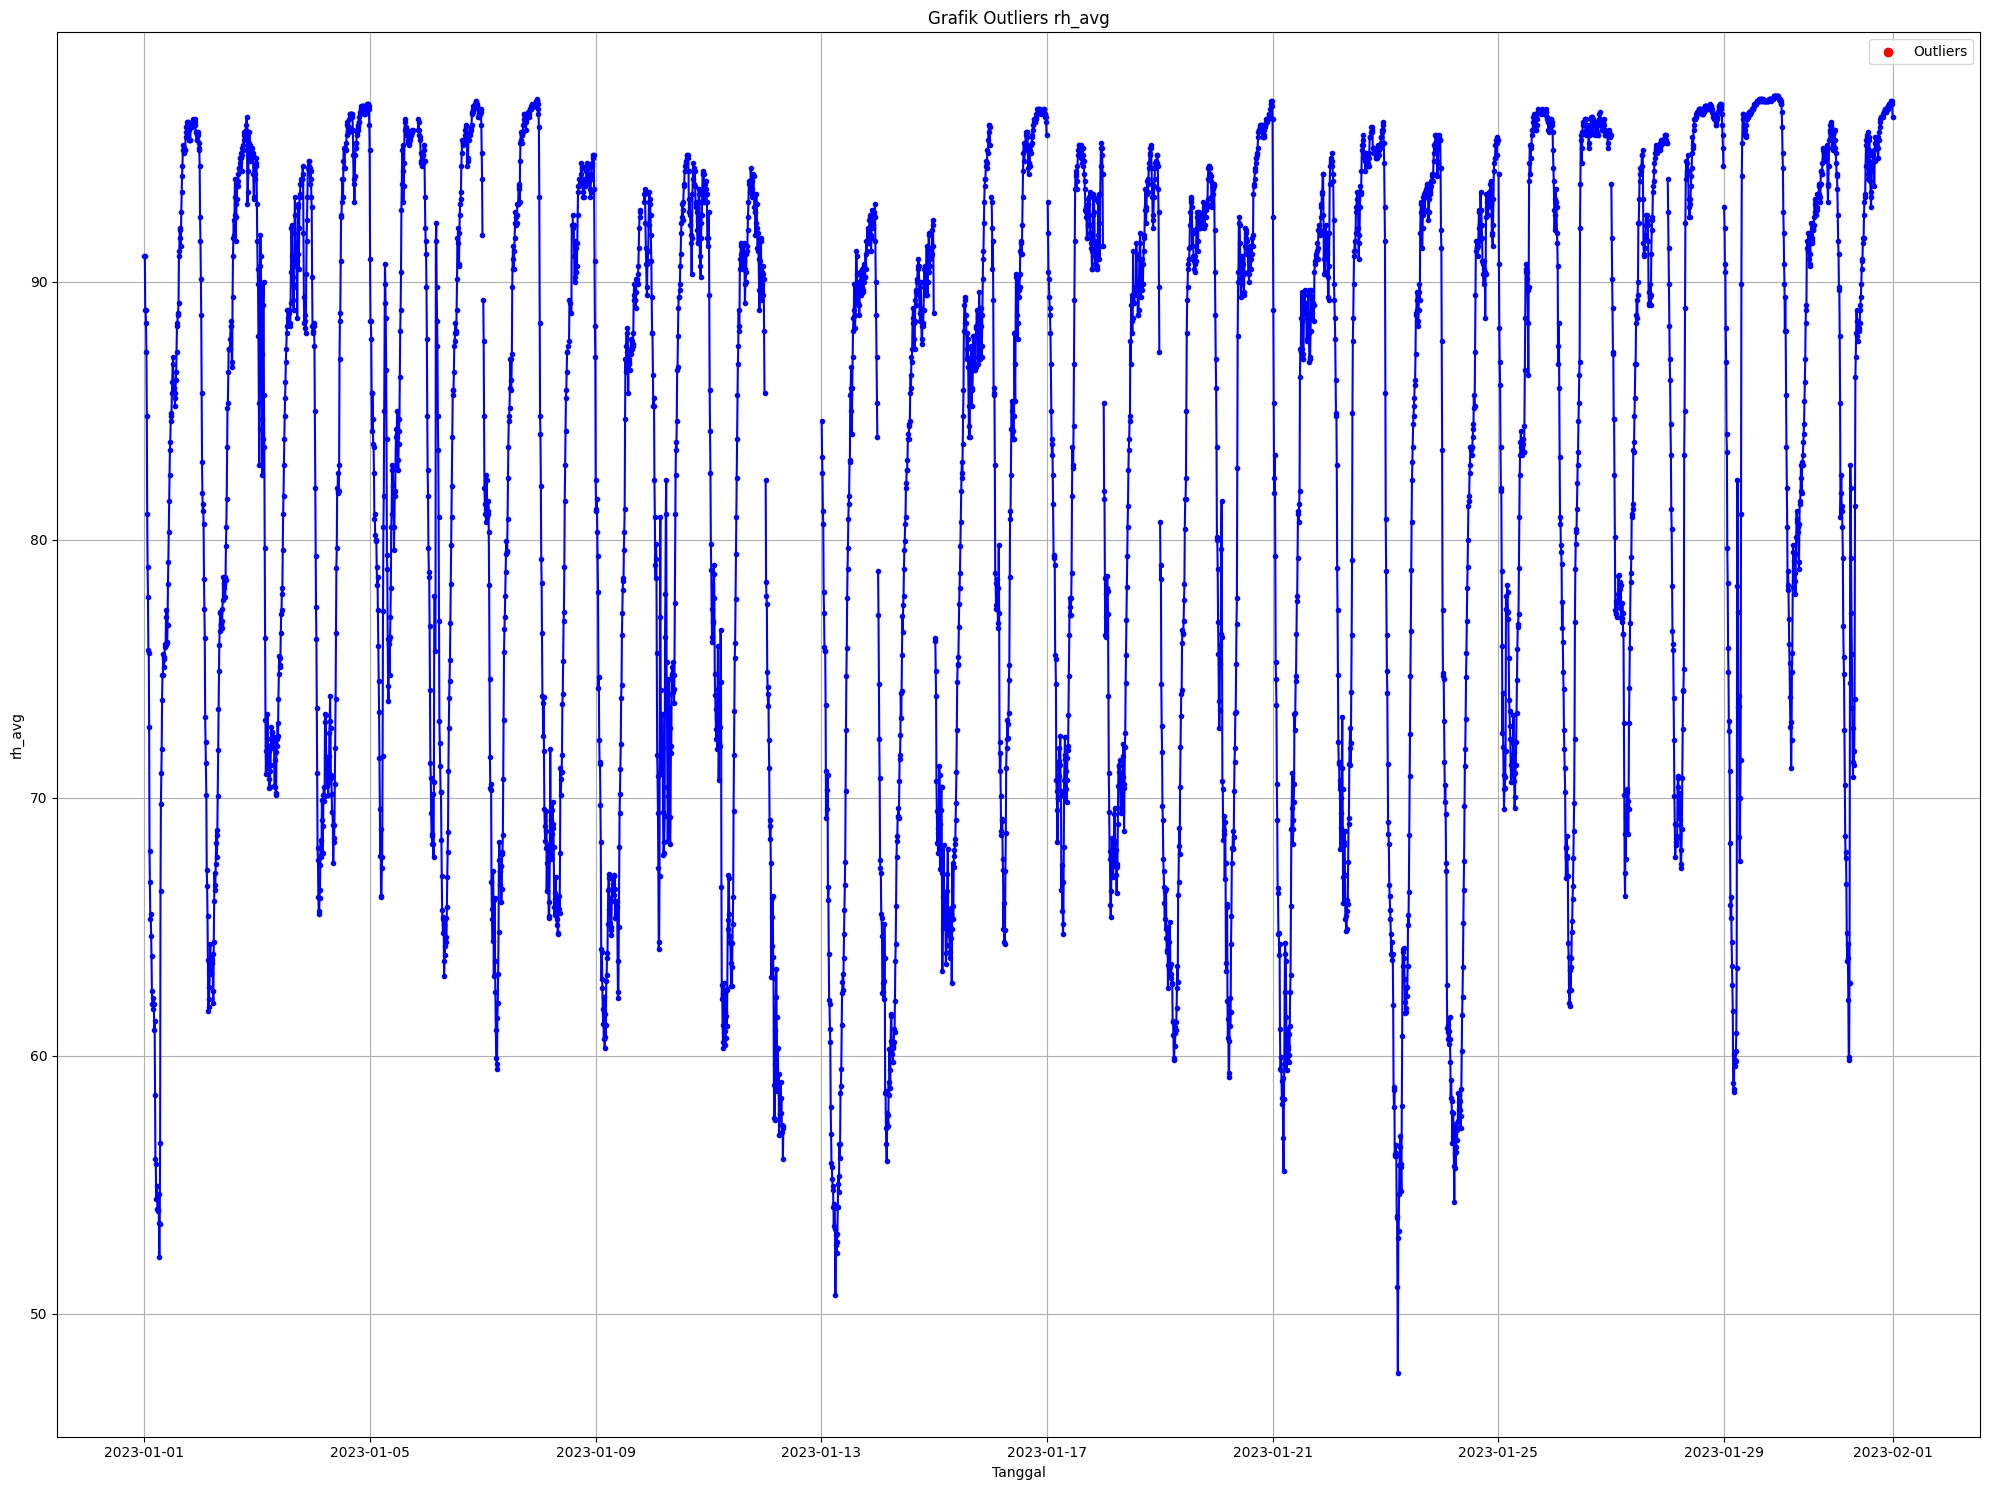


DAFTAR OUTLIER PA_QFE_Avg:

Tidak ada Outlier

GRAFIK PA_QFE_Avg



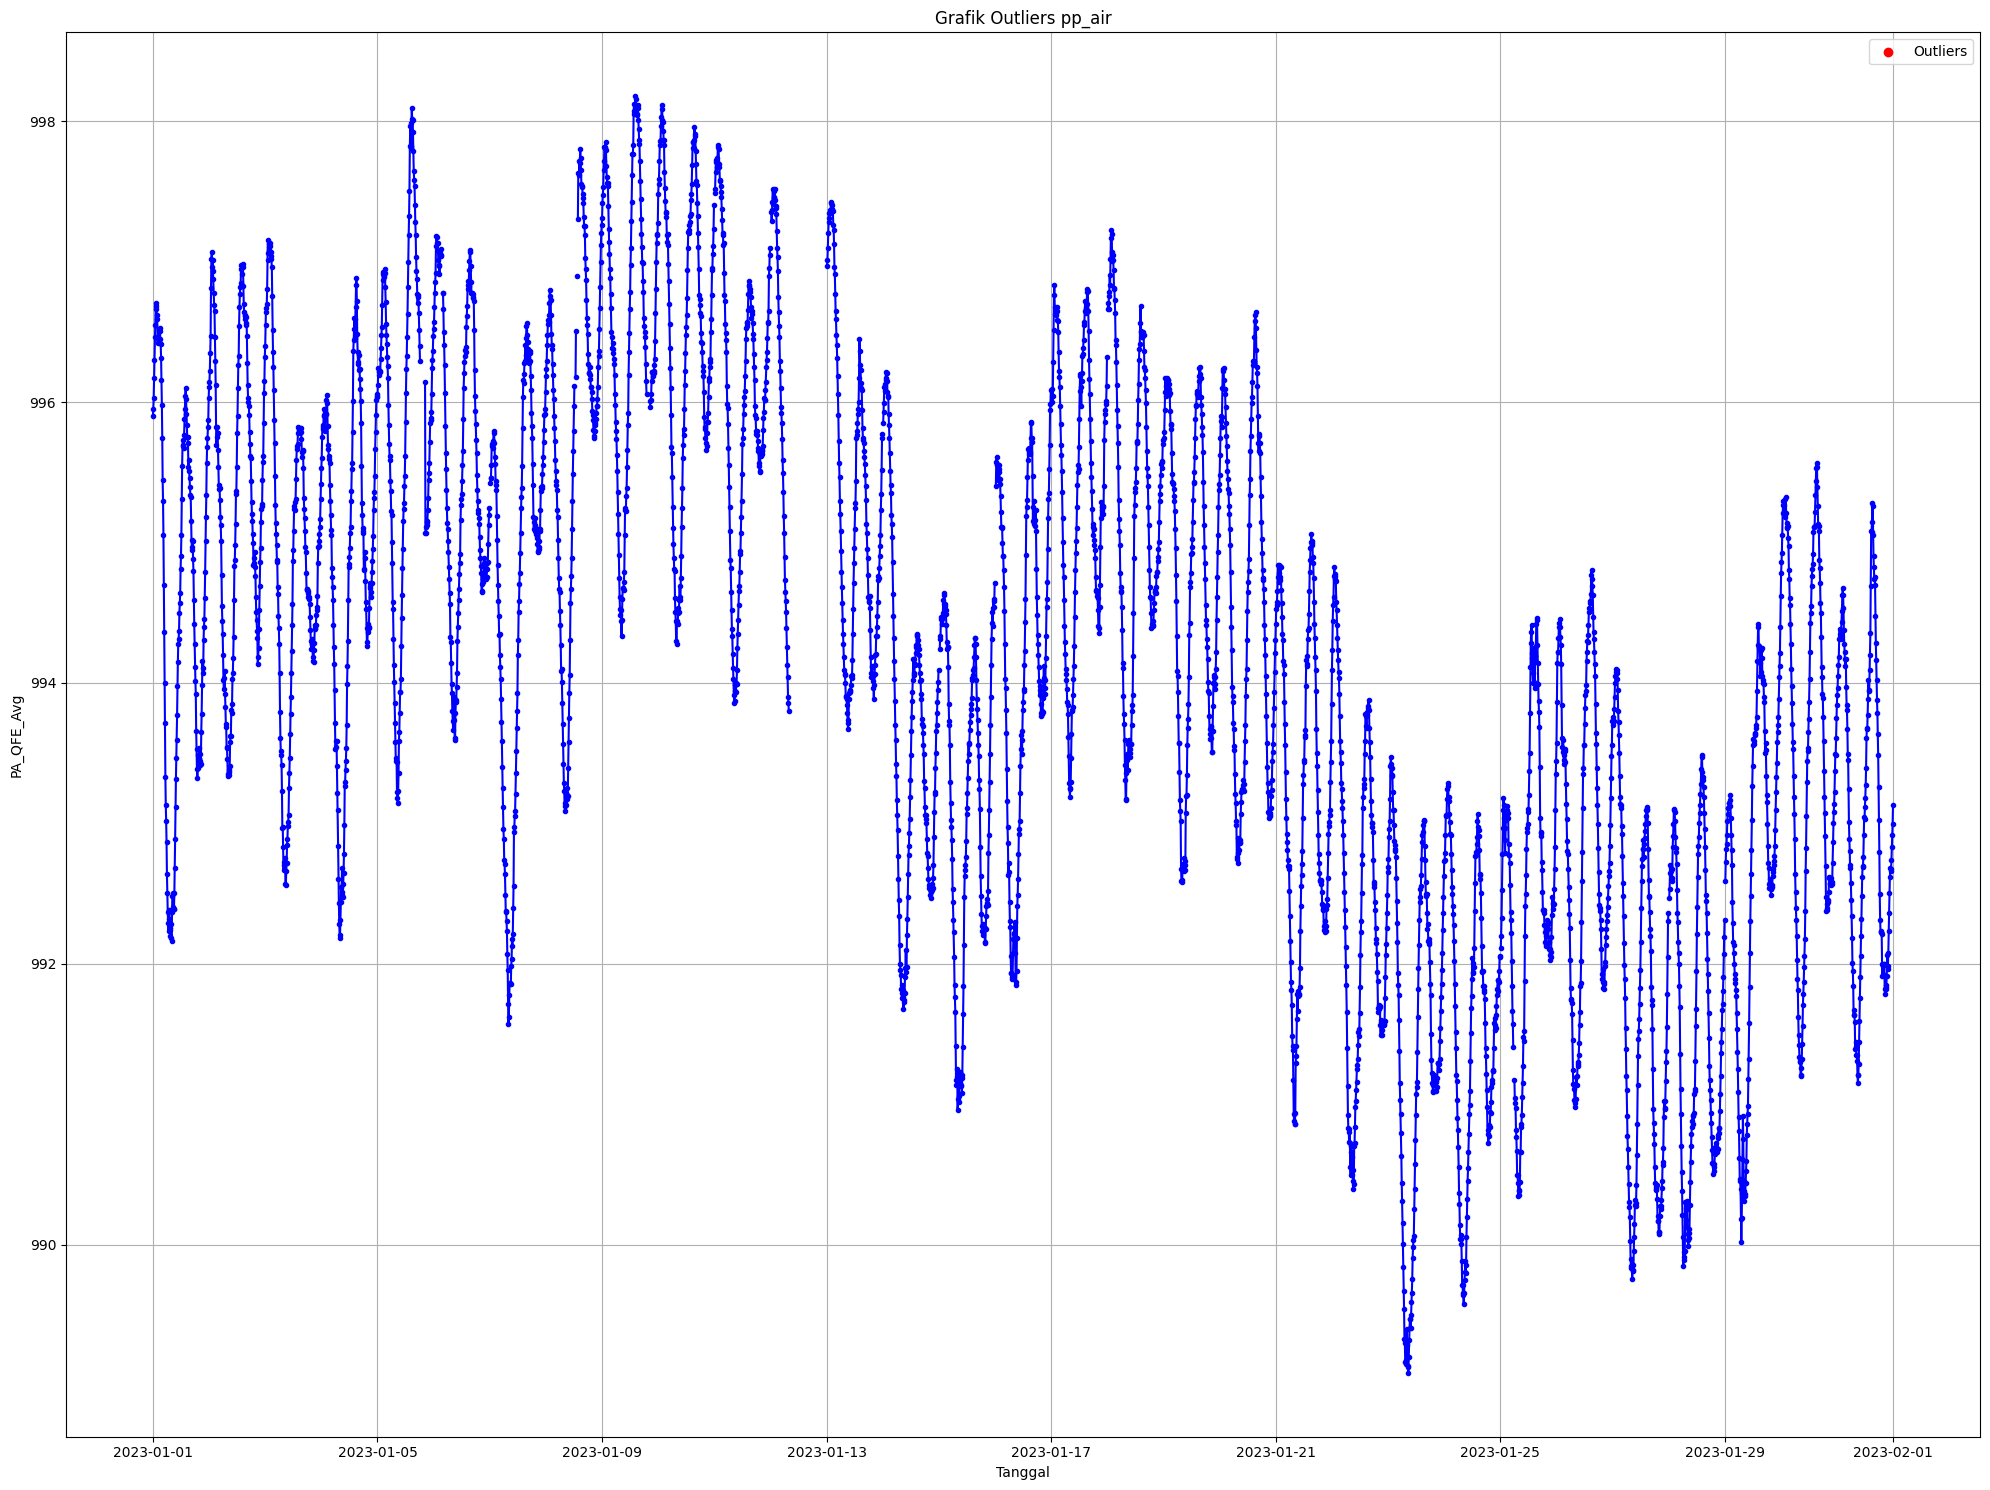


DAFTAR OUTLIER SR_meas_Avg:

Outlier SR_meas_Avg
2023-01-01 04:10:00 : 1005.0
2023-01-06 05:30:00 : 1049.0
2023-01-06 05:40:00 : 1027.0
2023-01-06 05:50:00 : 1009.0
2023-01-07 03:40:00 : 1015.0
2023-01-07 05:20:00 : 1053.0
2023-01-07 05:30:00 : 1054.0
2023-01-07 05:40:00 : 1035.0
2023-01-07 05:50:00 : 1019.0
2023-01-08 03:50:00 : 1028.0
2023-01-08 04:20:00 : 1012.0
2023-01-08 04:40:00 : 1036.0
2023-01-10 02:50:00 : 1004.0
2023-01-12 03:40:00 : 1057.0
2023-01-12 03:50:00 : 1065.0
2023-01-12 04:00:00 : 1008.0
2023-01-12 04:20:00 : 1013.0
2023-01-12 05:10:00 : 1006.0
2023-01-12 05:30:00 : 1053.0
2023-01-12 05:50:00 : 1008.0
2023-01-12 06:00:00 : 1028.0
2023-01-13 04:10:00 : 1035.0
2023-01-13 04:20:00 : 1090.0
2023-01-13 04:30:00 : 1125.0
2023-01-13 04:40:00 : 1114.0
2023-01-13 05:20:00 : 1080.0
2023-01-13 05:30:00 : 1089.0
2023-01-13 05:40:00 : 1013.0
2023-01-13 05:50:00 : 1037.0
2023-01-13 06:00:00 : 1017.0
2023-01-14 03:40:00 : 1086.0
2023-01-14 04:10:00 : 1021.0
2023-01-14 04:20:00 : 

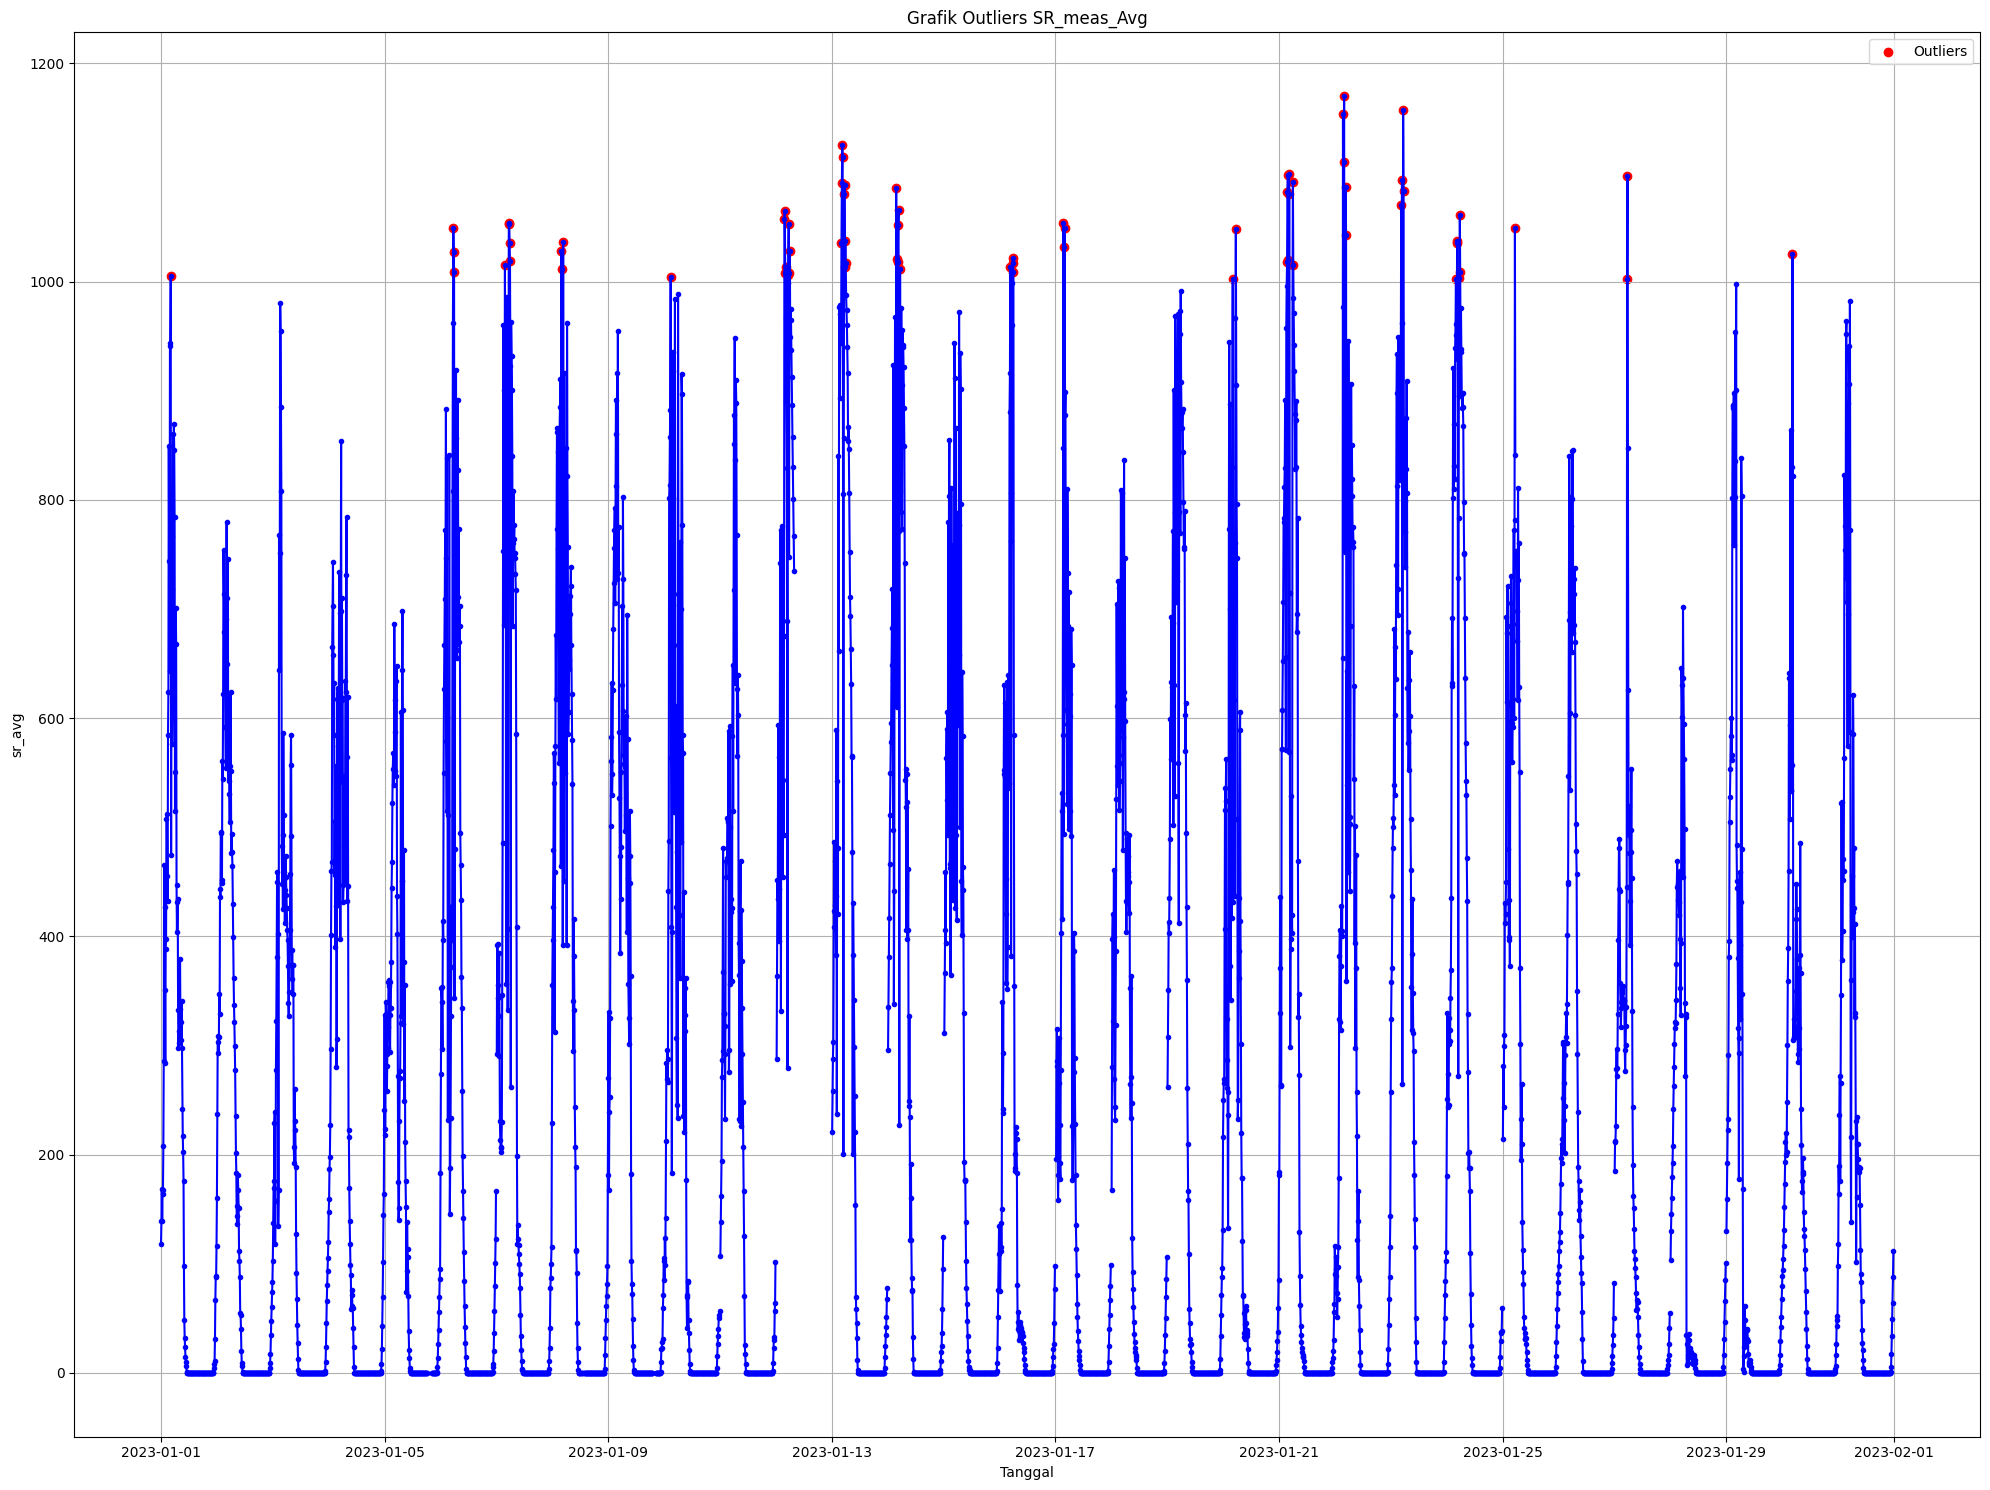


DAFTAR OUTLIER SR_meas_Max:

Outlier sr_max
2023-01-01 00:00:00 : 1029.0
2023-01-01 03:40:00 : 1005.0
2023-01-01 03:50:00 : 1155.0
2023-01-01 04:00:00 : 1205.0
2023-01-01 04:10:00 : 1205.0
2023-01-01 04:20:00 : 1205.0
2023-01-01 04:30:00 : 1205.0
2023-01-01 04:40:00 : 1205.0
2023-01-01 04:50:00 : 1205.0
2023-01-01 05:00:00 : 1205.0
2023-01-01 05:10:00 : 1205.0
2023-01-01 05:20:00 : 1205.0
2023-01-01 05:30:00 : 1205.0
2023-01-01 05:40:00 : 1205.0
2023-01-01 05:50:00 : 1205.0
2023-01-01 06:00:00 : 1205.0
2023-01-01 06:10:00 : 1205.0
2023-01-01 06:20:00 : 1205.0
2023-01-01 06:30:00 : 1205.0
2023-01-01 06:40:00 : 1205.0
2023-01-01 06:50:00 : 1205.0
2023-01-01 07:00:00 : 1205.0
2023-01-01 07:10:00 : 1205.0
2023-01-01 07:20:00 : 1205.0
2023-01-01 07:30:00 : 1205.0
2023-01-01 07:40:00 : 1205.0
2023-01-01 07:50:00 : 1205.0
2023-01-01 08:00:00 : 1205.0
2023-01-01 08:10:00 : 1205.0
2023-01-01 08:20:00 : 1205.0
2023-01-01 08:30:00 : 1205.0
2023-01-01 08:40:00 : 1205.0
2023-01-01 08:50:00 : 1205.

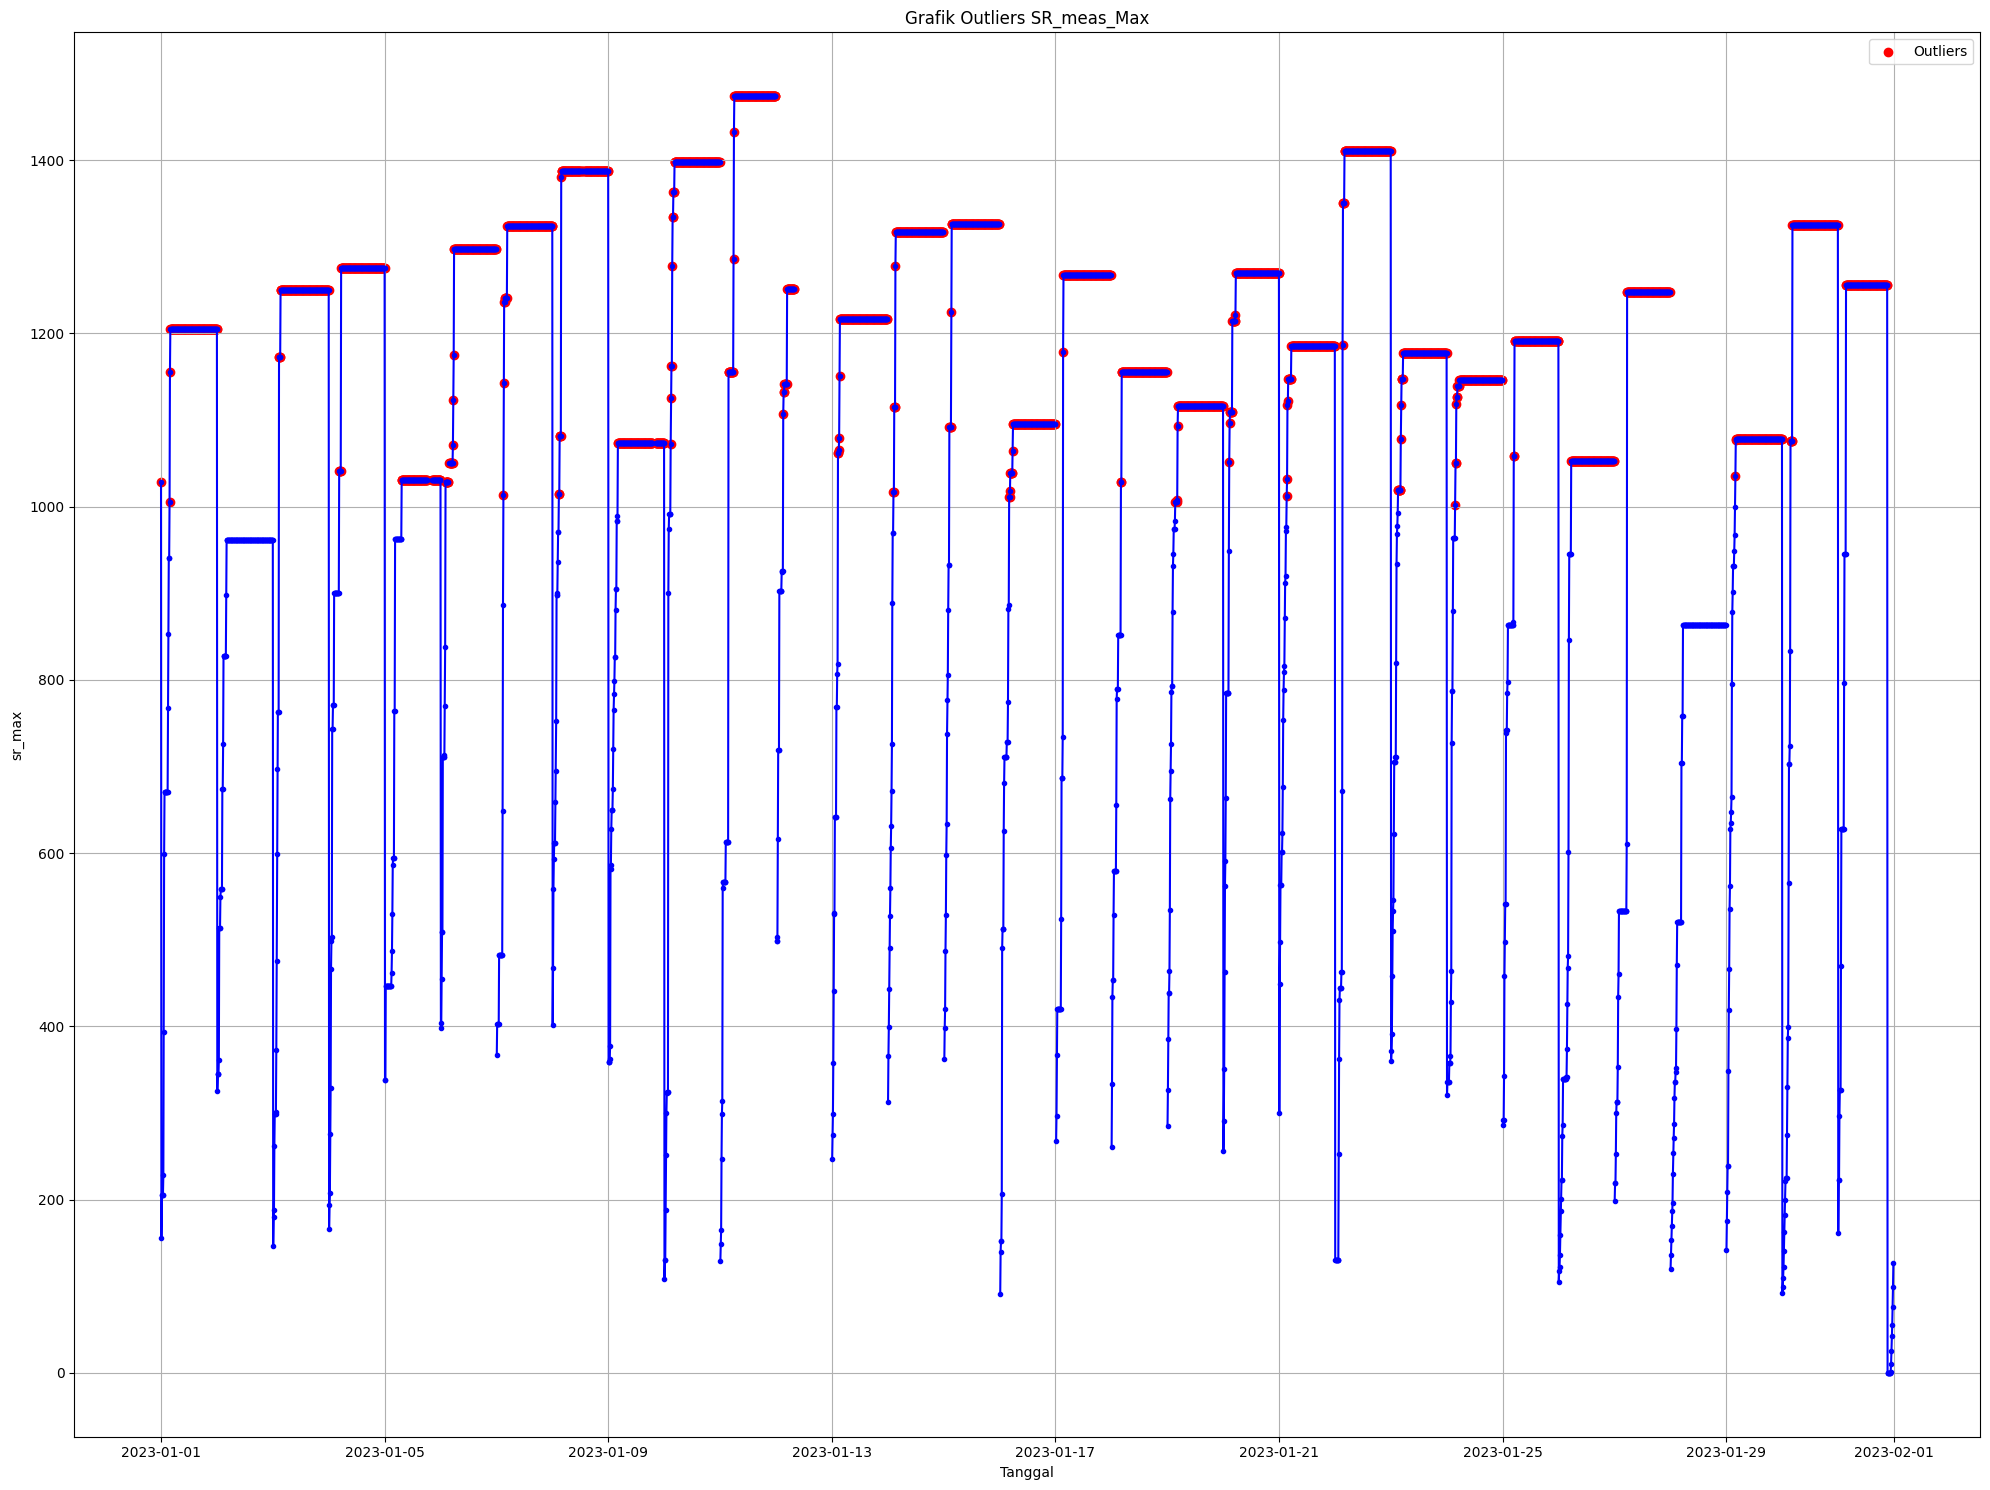


DAFTAR OUTLIER WS_meas_Max:

Tidak ada Outlier

GRAFIK WS_meas_Max



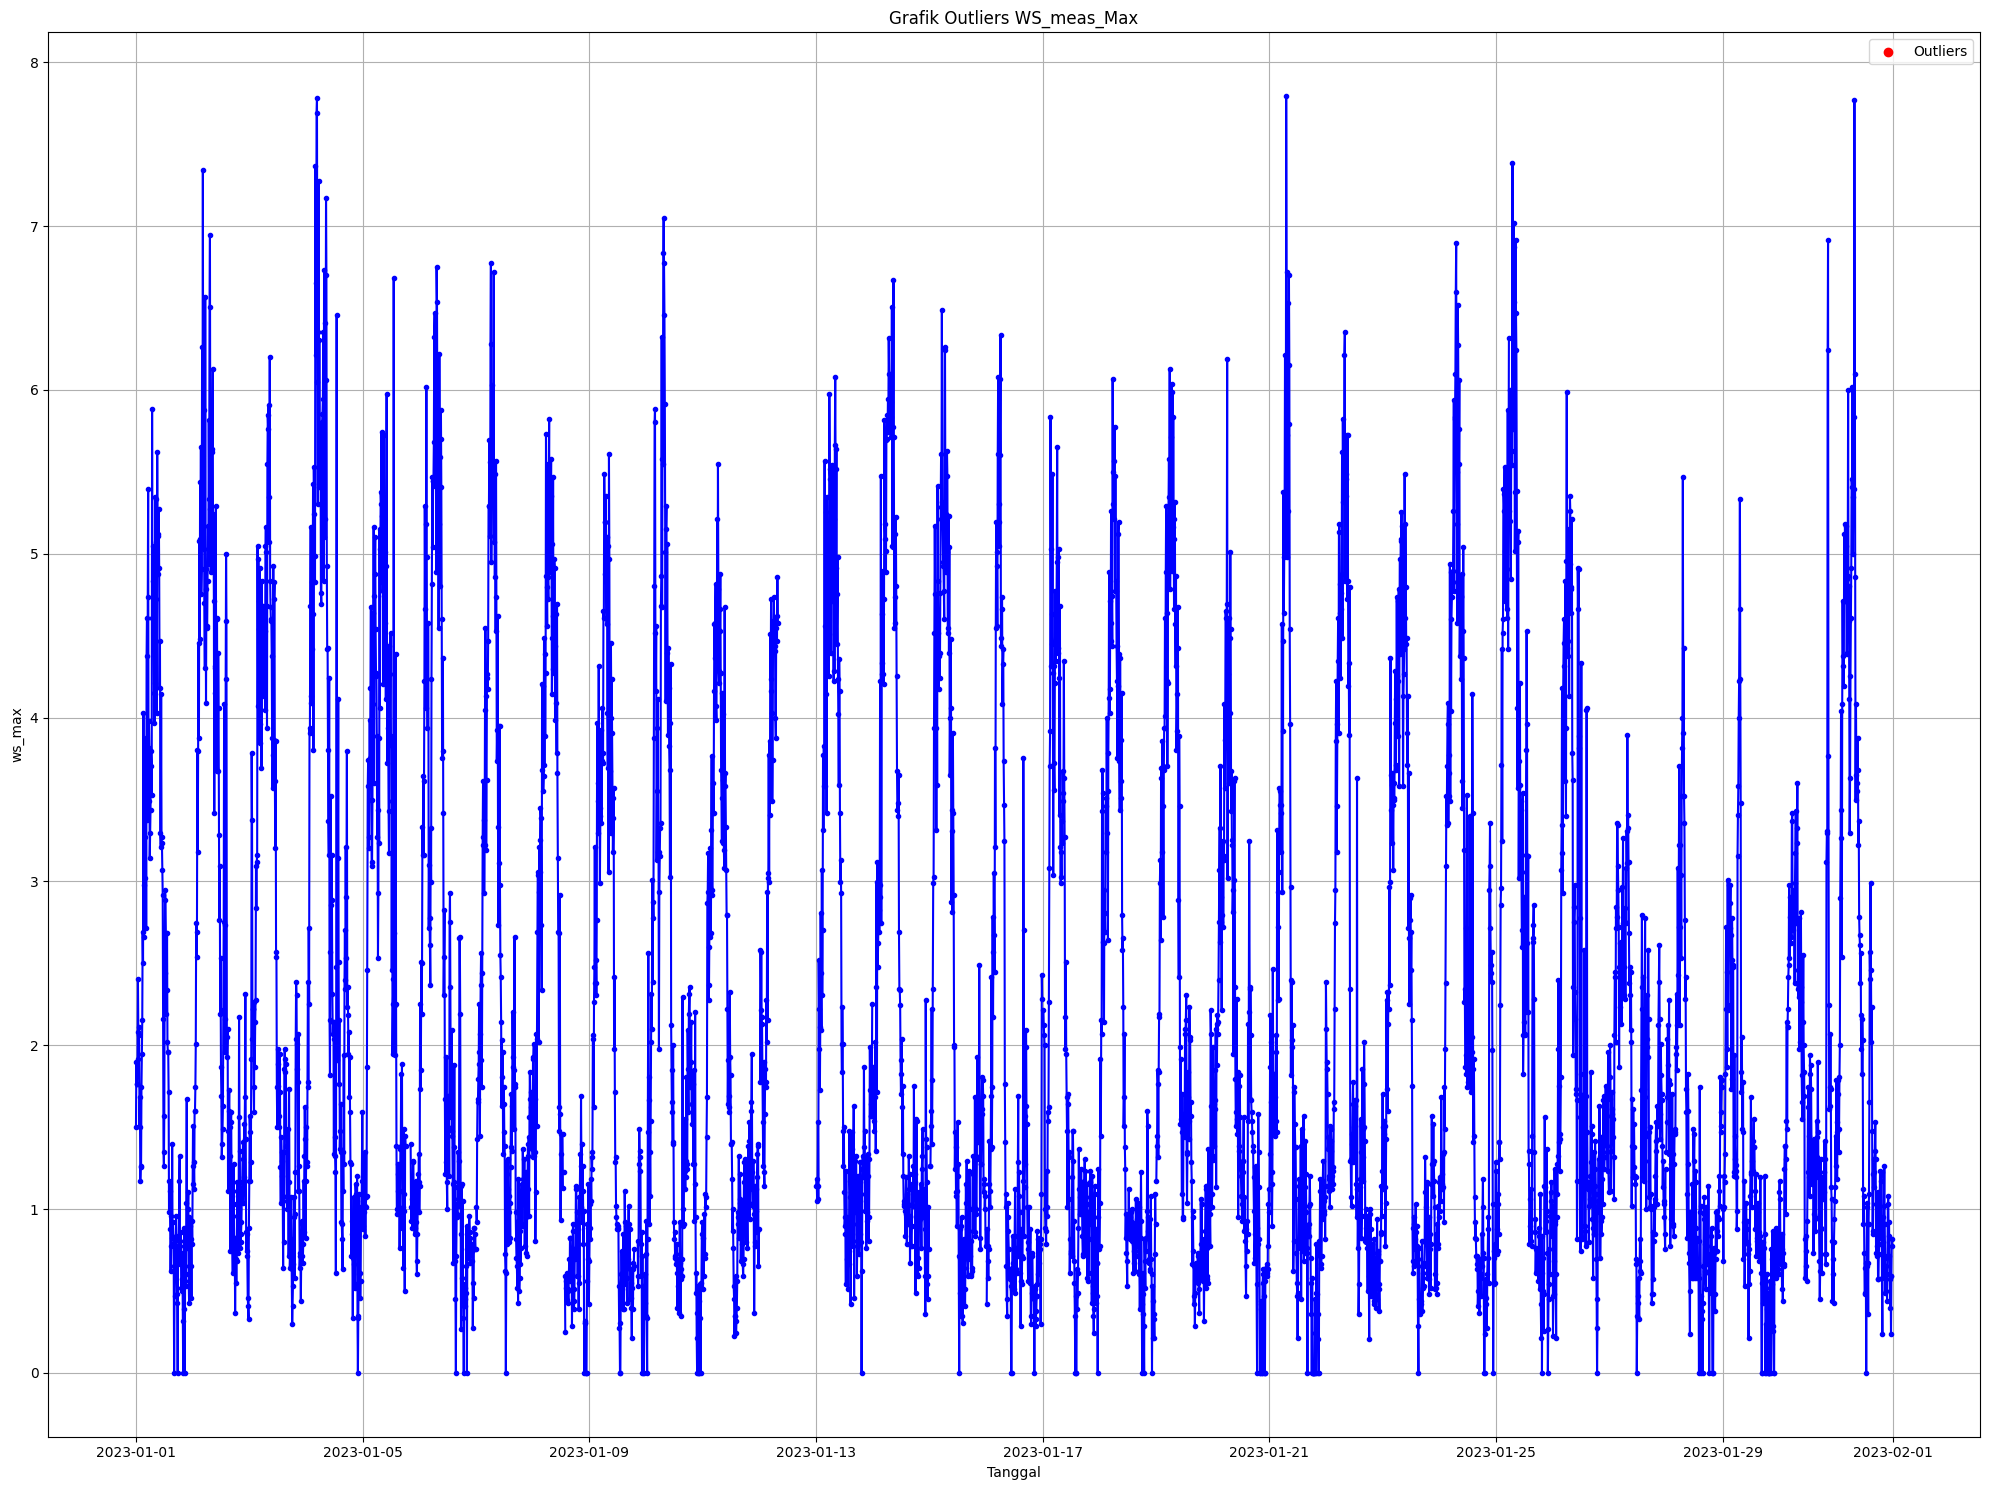


DAFTAR OUTLIER WS_meas_Avg:

Tidak ada Outlier

GRAFIK WS_meas_Avg



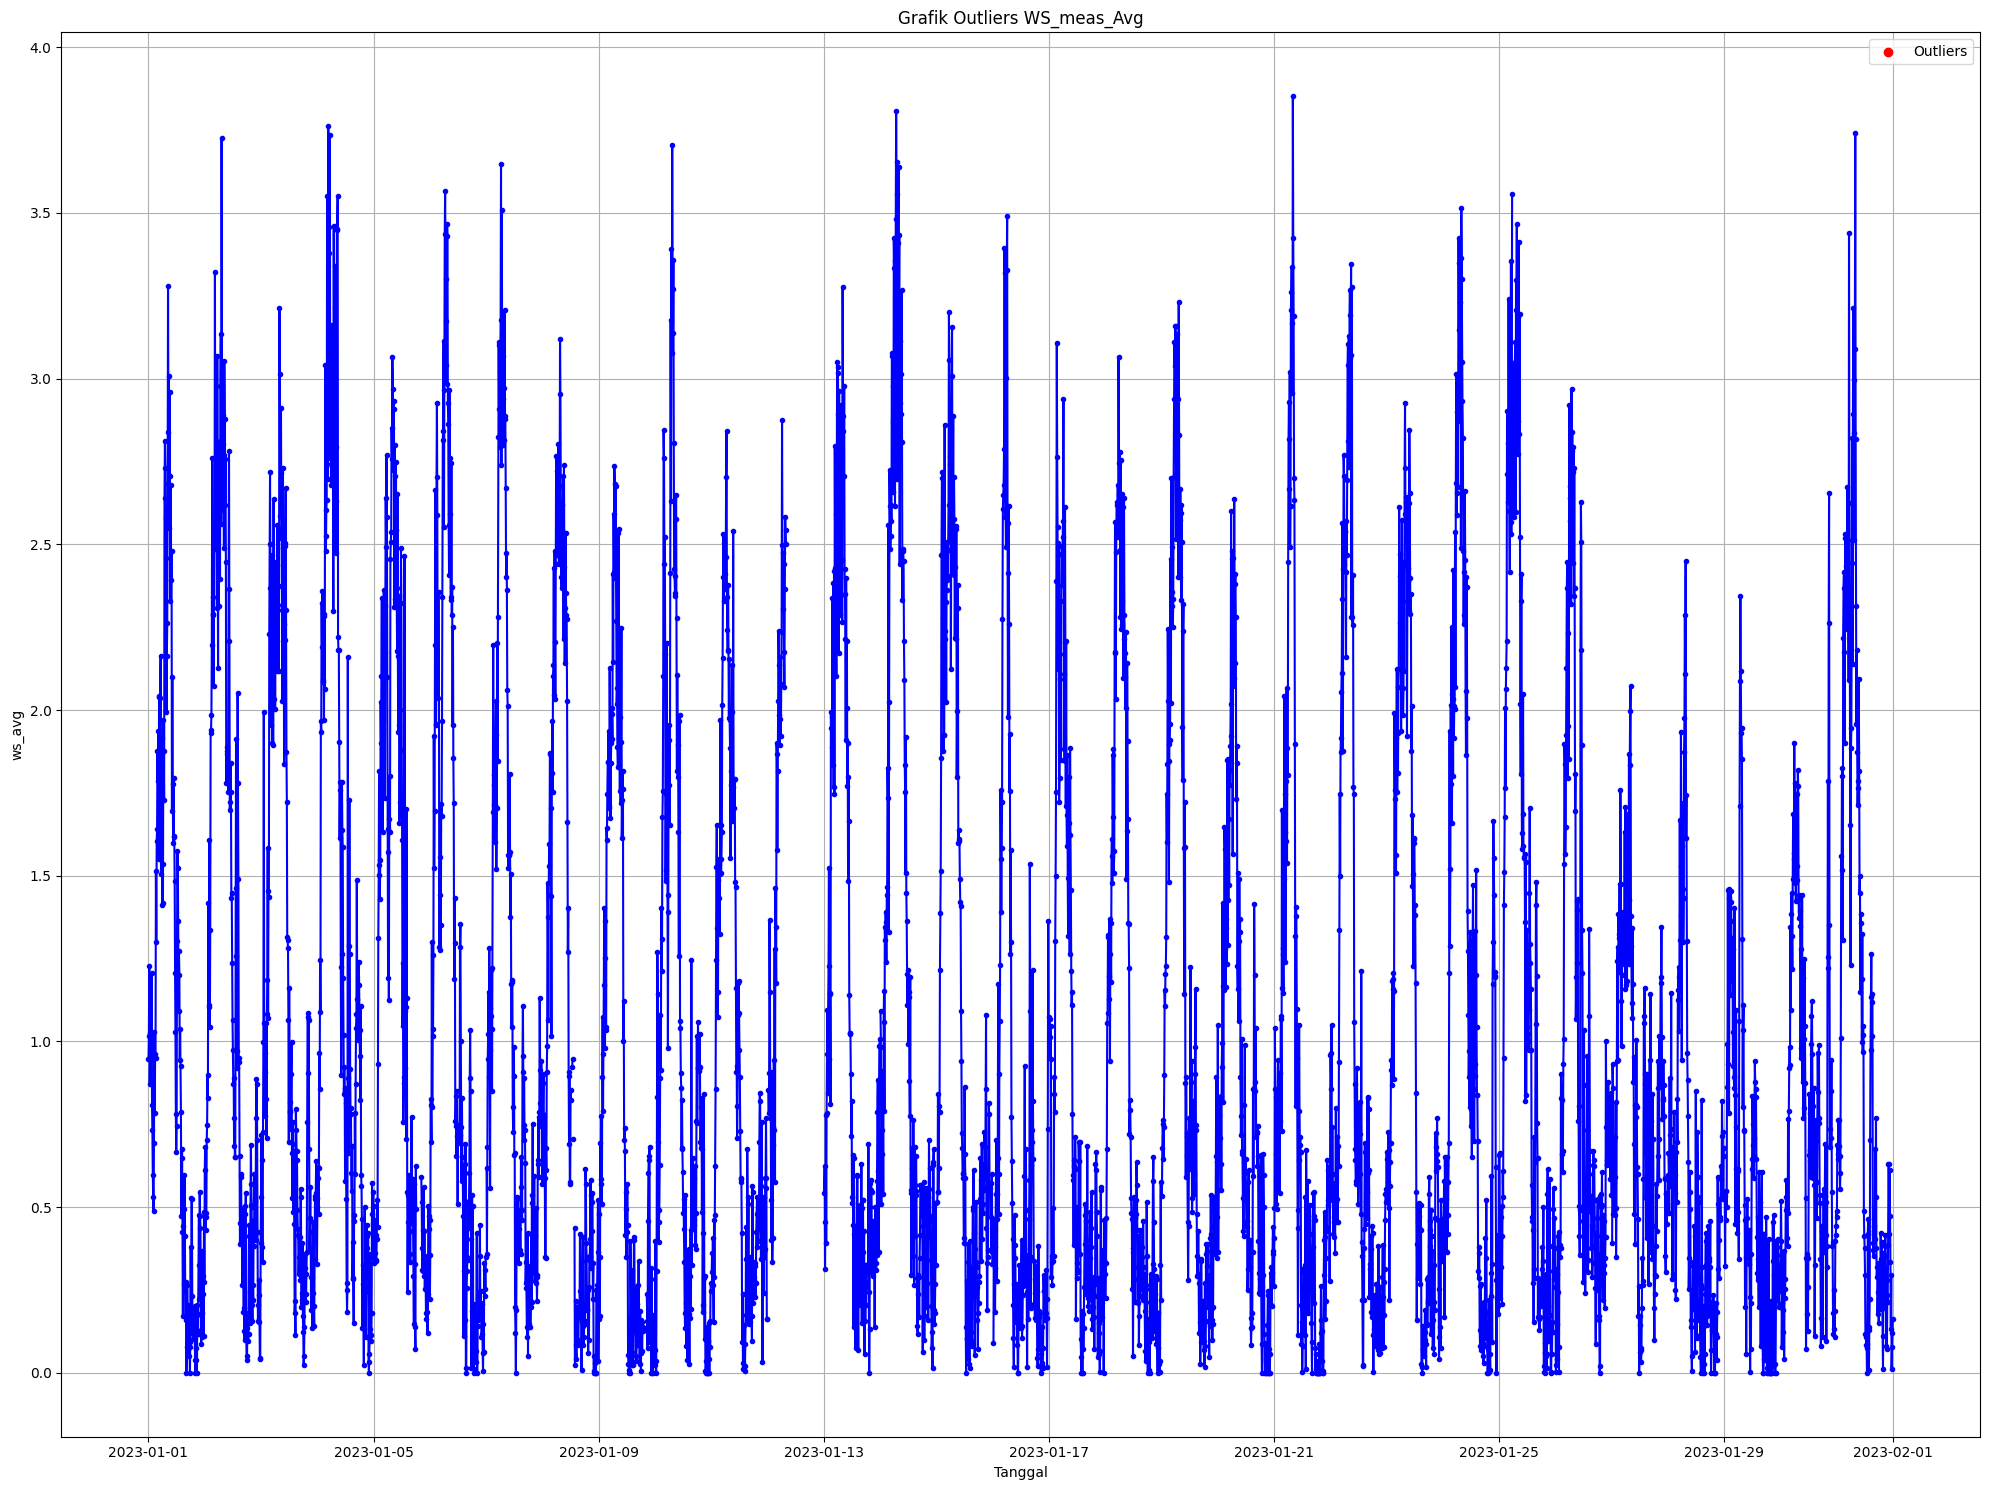


DAFTAR OUTLIER WD_meas_Avg:

Tidak ada Outlier

GRAFIK WD_meas_Avg



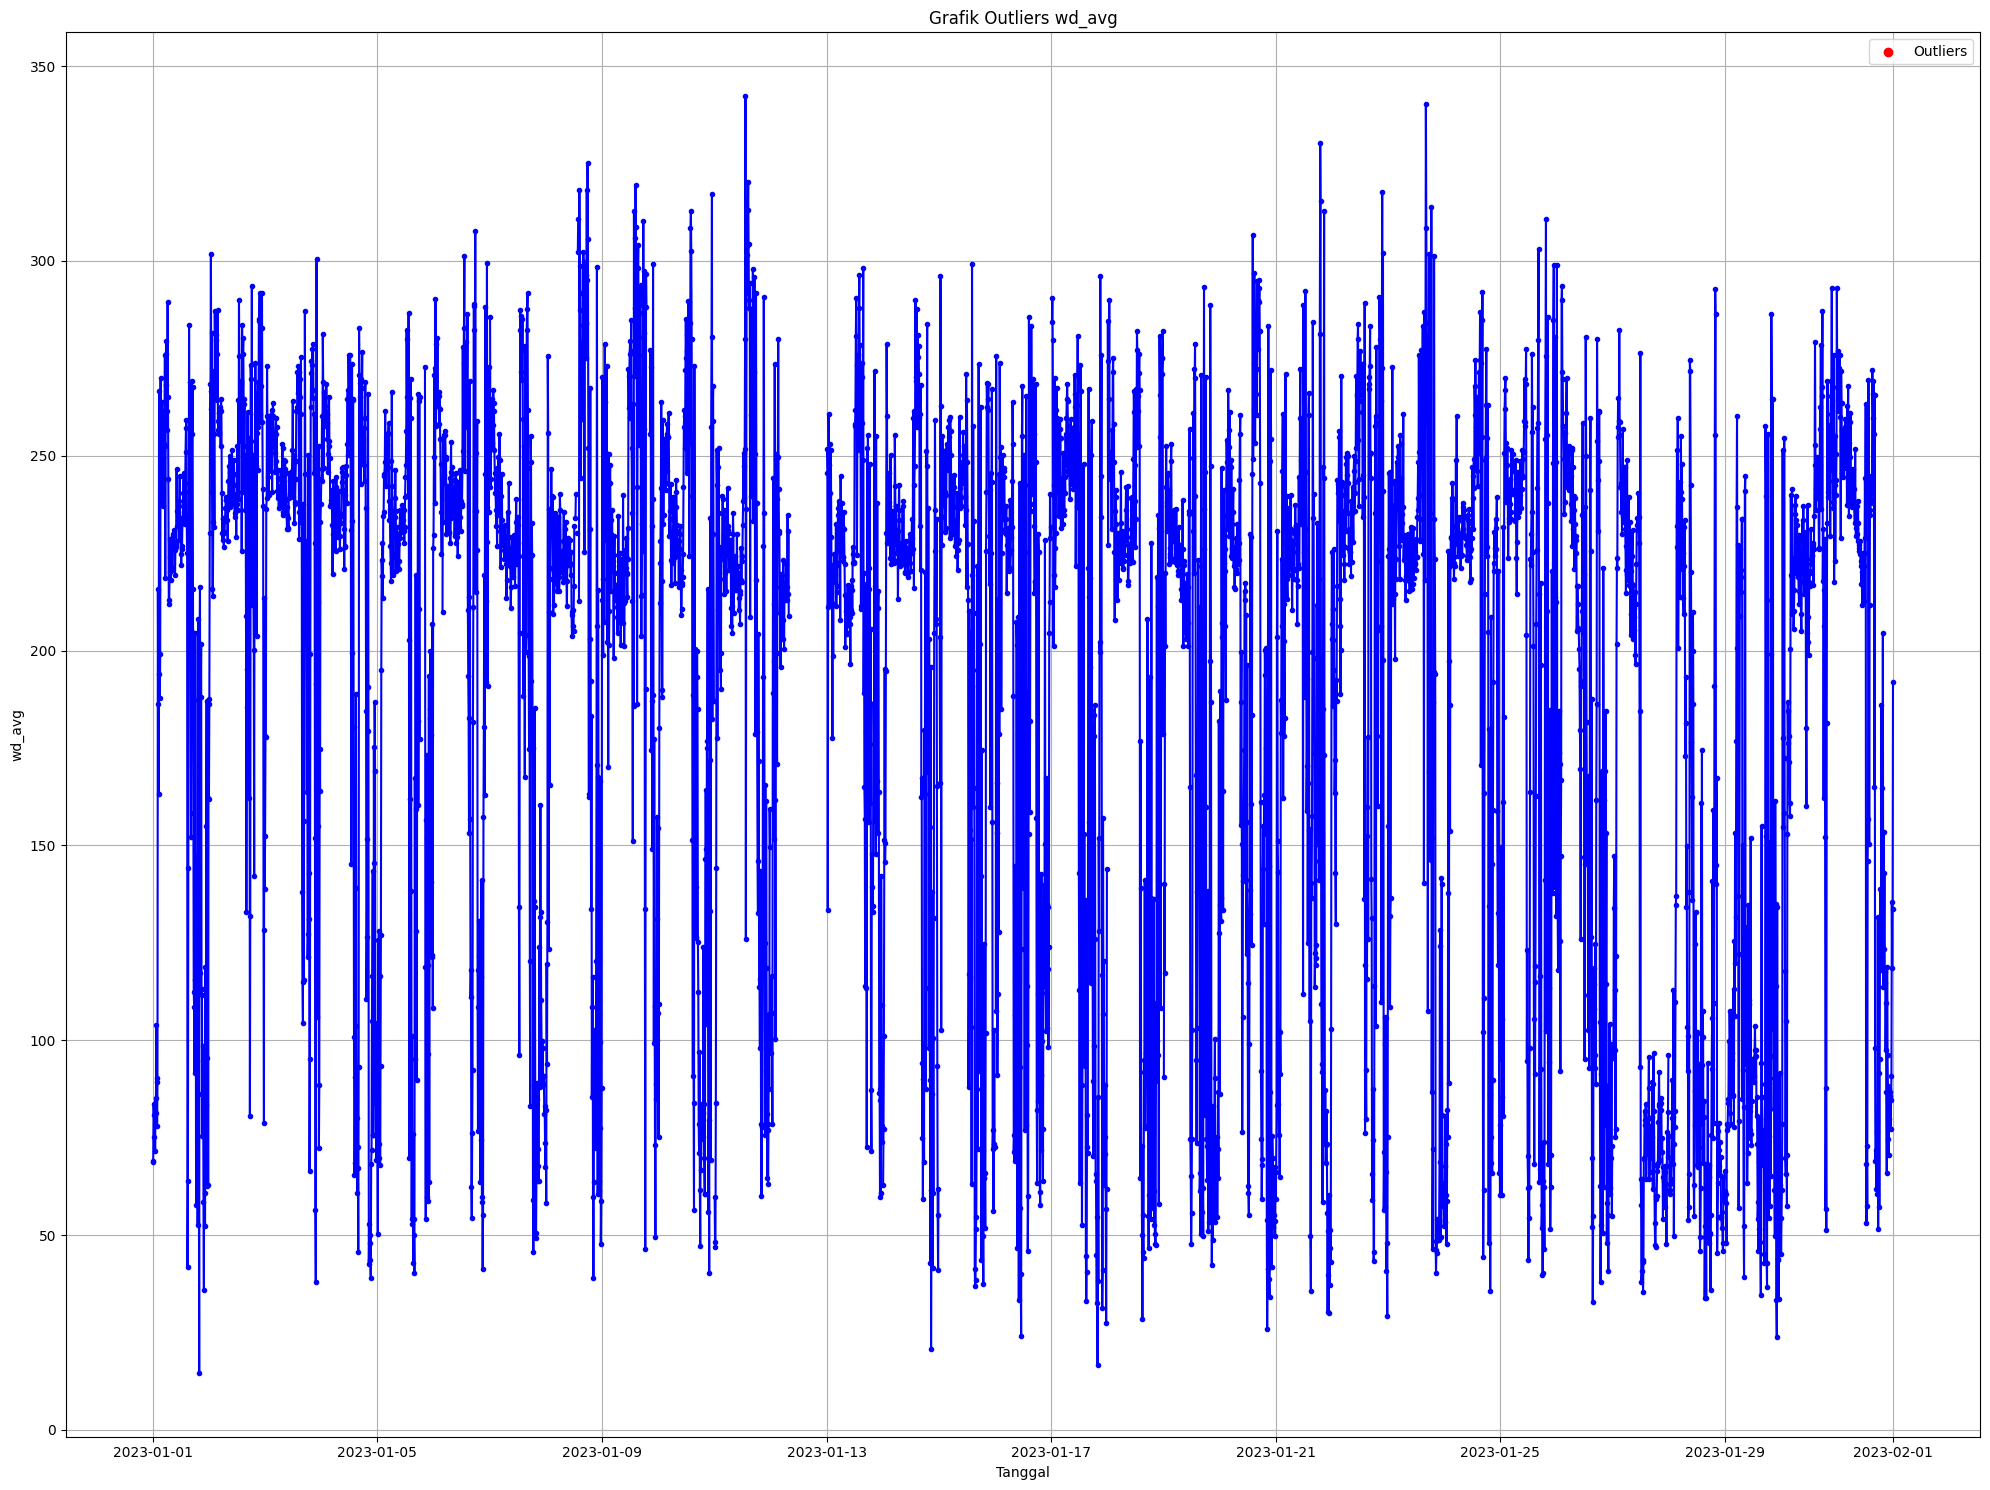


DAFTAR OUTLIER PR_meas_Tot:

Tidak ada Outlier

GRAFIK PR_meas_Tot



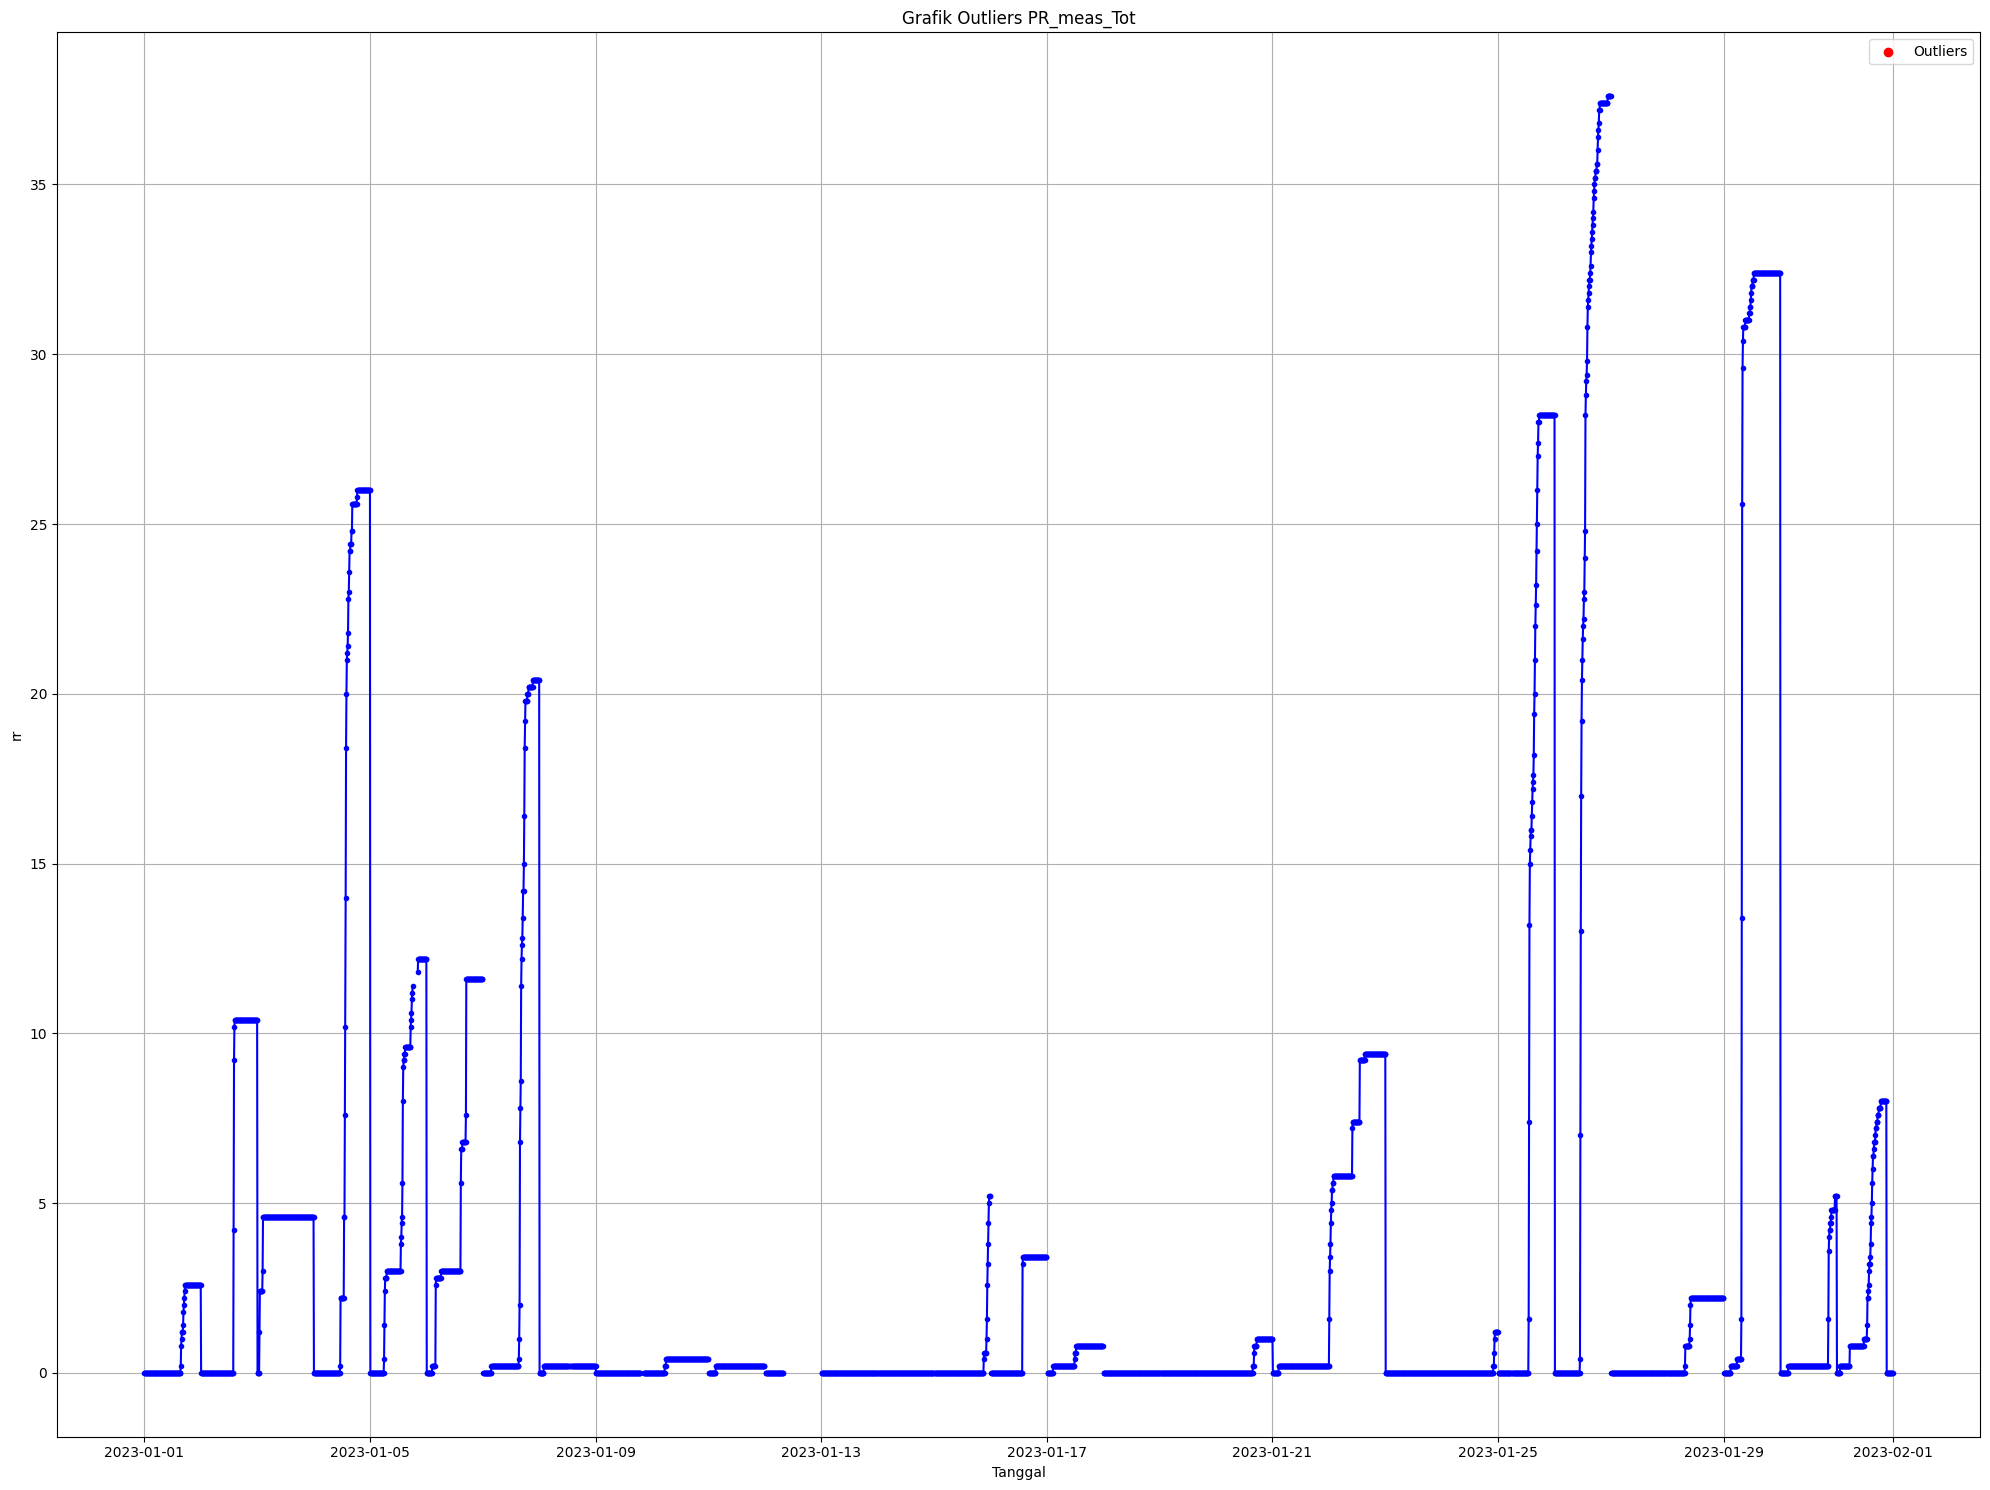

In [72]:
df4 = df3.drop(columns=['Tanggal','Nama Stasiun','Lattitude','Longitude', 'rr', 'ws_avg', 'ws_max',
       'wd_avg','sr_avg','sr_max','Arah_Mata_Angin','ws_50cm','wl_pan','ev_pan','konduktivitas','ph_sea','nr','wl','tt_sea','tt_pan'])

#Outlier suhu, RH, dan PA
df4 = df4.astype(float)
def find_outliers_IQR(df4):
   q1=df4.quantile(0.25)
   q3=df4.quantile(0.75)
   IQR=q3-q1
   outliers = df4[((df4<(q1-1.5*IQR)) | (df4>(q3+1.5*IQR)))]
   return outliers
outliers = find_outliers_IQR(df4)

#Outlier SR
#Avg
v = df3['sr_avg'].values.tolist()
sr_avg=[]
for value in v:
  if value > 1000:
      sr_avg.append(value)
#Max
p = df3['sr_max'].values.tolist()
sr_max = []
for value in p:
    if value > 1000:
        sr_max.append(value)

#knot
#Max
h = df3['ws_max'].values.tolist()
ws_max = []
for value in h:
    if value > 30:
        ws_max_knot.append(value)
#Avg
i = df3['ws_avg'].values.tolist()
ws_avg = []
for value in i:
    if value > 58.31:
        ws_avg_knot.append(value)

#WD
j = df3['wd_avg'].values.tolist()
wd = []
for value in j:
    if value > 360:
        wd.append(value)
#Arah angin
k = df3['Arah_Mata_Angin'].values.tolist()
arah_angin = []
for value in k:
    if value == "":
        arah_angin.append(value)

#Outlier hujan
u = df3['rr'].values.tolist()
hujan = []
for value in u:
    if value > 50:
        hujan.append(value)

#Persebaran Data Outlier dengan grafik
print("""

Persebaran Outlier

""")

df4.insert(0, 'Tanggal', df3['Tanggal'])
df4['Tanggal'] = dp.to_datetime((df4['Tanggal']))
df4['rr']=df3['rr']
df4['ws_avg']=df3['ws_avg']
df4['ws_max']=df3['ws_max']
df4['wd_avg']=df3['wd_avg']
df4['Arah_Mata_Angin']=df3['Arah_Mata_Angin']
df4['tt_air_max']=df3['tt_air_max']
df4['tt_air_avg']=df3['tt_air_avg']
df4['tt_air_min']=df3['tt_air_min']
df4['rh_avg']=df3['rh_avg']
df4['pp_air']=df3['pp_air']
df4['sr_avg']=df3['sr_avg']
df4['sr_max']=df3['sr_max']
del df4['index']

#TA_meas_Avg
print('''
DAFTAR OUTLIER TA_meas_Avg:
''')
Q1_suhuavg = df4['tt_air_avg'].quantile(0.25)
Q3_suhuavg = df4['tt_air_avg'].quantile(0.75)
IQR_suhuavg = Q3_suhuavg - Q1_suhuavg
batas_bawah_suhuavg = Q1_suhuavg - 1.5 * IQR_suhuavg
batas_atas_suhuavg = Q3_suhuavg + 1.5 * IQR_suhuavg
t = df4['tt_air_avg'][(df4['tt_air_avg'] < batas_bawah_suhuavg) | (df4['tt_air_avg'] > batas_atas_suhuavg)]
if len(t)>=1:
  outliers = dp.concat([df4[df4['tt_air_avg'] < batas_bawah_suhuavg],
                        df4[df4['tt_air_avg'] > batas_atas_suhuavg]])
  print("Outlier TA_meas_Avg")
  for index, row in outliers.iterrows():
      print(row['Tanggal'],':',row['tt_air_avg'])
else:
  print("Tidak ada Outlier")

plt.figure(figsize=(20,15))
#df5.reset_index(drop=False, inplace=True)
plt.plot(df4['Tanggal'], df4['tt_air_avg'], 'b.-')
# Tandai titik-titik outliers pada grafik
outlier_indices_suhuavg = df4[df4['tt_air_avg'].isin(t)].index
plt.scatter(df4['Tanggal'].iloc[outlier_indices_suhuavg], df4['tt_air_avg'].iloc[outlier_indices_suhuavg], color='r', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('tt_air_avg')
plt.title('Grafik Outliers TA_meas_Avg')
plt.legend()
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
print("""
GRAFIK TA_meas_Avg
""")
plt.show()

#TA_meas_Max
print('''
DAFTAR OUTLIER TA_meas_Max:
''')
Q1_suhumax = df4['tt_air_max'].quantile(0.25)
Q3_suhumax = df4['tt_air_max'].quantile(0.75)
IQR_suhumax = Q3_suhumax - Q1_suhumax
batas_bawah_suhumax = Q1_suhumax - 1.5 * IQR_suhumax
batas_atas_suhumax = Q3_suhumax + 1.5 * IQR_suhumax
t_max = df4['tt_air_max'][(df4['tt_air_max'] < batas_bawah_suhumax) | (df4['tt_air_max'] > batas_atas_suhumax)]
if len(t_max)>=1:
  outliers1 = dp.concat([df4[df4['tt_air_max'] < batas_bawah_suhumax],
                        df4[df4['tt_air_max'] > batas_atas_suhumax]])
  print("Outlier TA_meas_Max")
  for index, row in outliers1.iterrows():
      print(row['Tanggal'],':',row['tt_air_max'])
else:
  print("Tidak ada Outlier")

plt.figure(figsize=(20,15))
plt.plot(df4['Tanggal'], df4['tt_air_max'], 'b.-')
# Tandai titik-titik outliers pada grafik
outlier_indices_suhumax = df4[df4['tt_air_max'].isin(t_max)].index
plt.scatter(df4['Tanggal'].iloc[outlier_indices_suhumax], df4['tt_air_max'].iloc[outlier_indices_suhumax], color='r', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('tt_air_max')
plt.title('Grafik Outliers TA_meas_Max')
plt.legend()
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
print("""
GRAFIK TA_meas_Max
""")
plt.show()

#TA_meas_Min
print('''
DAFTAR OUTLIER TA_meas_Min:
''')
Q1_suhumin = df4['tt_air_min'].quantile(0.25)
Q3_suhumin = df4['tt_air_min'].quantile(0.75)
IQR_suhumin = Q3_suhumin - Q1_suhumin
batas_bawah_suhumin = Q1_suhumin - 1.5 * IQR_suhumin
batas_atas_suhumin = Q3_suhumin + 1.5 * IQR_suhumin
t_min = df4['tt_air_min'][(df4['tt_air_min'] < batas_bawah_suhumin) | (df4['tt_air_min'] > batas_atas_suhumin)]
if len(t_min)>=1:
  outliers2 = dp.concat([df4[df4['tt_air_min'] < batas_bawah_suhumin],
                        df4[df4['tt_air_min'] > batas_atas_suhumin]])
  print("Outlier TA_meas_Min")
  for index, row in outliers2.iterrows():
      print(row['Tanggal'],':',row['tt_air_min'])
else:
  print("Tidak ada Outlier")

plt.figure(figsize=(20,15))
plt.plot(df4['Tanggal'], df4['tt_air_min'], 'b.-')
# Tandai titik-titik outliers pada grafik
outlier_indices_suhumin = df4[df4['tt_air_min'].isin(t_min)].index
plt.scatter(df4['Tanggal'].iloc[outlier_indices_suhumin], df4['tt_air_min'].iloc[outlier_indices_suhumin], color='r', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('tt_air_min')
plt.title('Grafik Outliers TA_meas_Min')
plt.legend()
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
print("""
GRAFIK TA_meas_Min
""")
plt.show()

#RH_meas_Avg
print('''
DAFTAR OUTLIER RH_meas_Avg:
''')
Q1_RH = df4['rh_avg'].quantile(0.25)
Q3_RH = df4['rh_avg'].quantile(0.75)
IQR_RH = Q3_RH - Q1_RH
batas_bawah_RH = Q1_RH - 1.5 * IQR_RH
batas_atas_RH = Q3_RH + 1.5 * IQR_RH
t_RH = df4['rh_avg'][(df4['rh_avg'] < batas_bawah_RH) | (df4['rh_avg'] > batas_atas_RH)]
if len(t_RH)>=1:
  outliers3 = dp.concat([df4[df4['rh_avg'] < batas_bawah_RH],
                        df4[df4['rh_avg'] > batas_atas_RH]])
  print("Outlier RH_meas_Avg")
  for index, row in outliers3.iterrows():
      print(row['Tanggal'],':',row['rh_avg'])
else:
  print("Tidak ada Outlier")

plt.figure(figsize=(20,15))
plt.plot(df4['Tanggal'], df4['rh_avg'], 'b.-')
# Tandai titik-titik outliers pada grafik
outlier_indices_RH = df4[df4['rh_avg'].isin(t_RH)].index
plt.scatter(df4['Tanggal'].iloc[outlier_indices_RH], df4['rh_avg'].iloc[outlier_indices_RH], color='r', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('rh_avg')
plt.title('Grafik Outliers rh_avg')
plt.legend()
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
print("""
GRAFIK RH_meas_Avg
""")
plt.show()

#PA_QFE_Avg
print('''
DAFTAR OUTLIER PA_QFE_Avg:
''')
Q1_QFE_Avg = df4['pp_air'].quantile(0.25)
Q3_QFE_Avg  = df4['pp_air'].quantile(0.75)
IQR_QFE_Avg  = Q3_QFE_Avg  - Q1_QFE_Avg
batas_bawah_QFE_Avg  = Q1_QFE_Avg  - 1.5 * IQR_QFE_Avg
batas_atas_QFE_Avg  = Q3_QFE_Avg  + 1.5 * IQR_QFE_Avg
t_QFE_Avg  = df4['pp_air'][(df4['pp_air'] < batas_bawah_QFE_Avg ) | (df4['pp_air'] > batas_atas_QFE_Avg )]
if len(t_QFE_Avg):
  outliers5 = dp.concat([df4[df4['pp_air'] < batas_bawah_QFE_Avg],
                        df4[df4['pp_air'] > batas_atas_QFE_Avg ]])
  print("Outlier pp_air")
  for index, row in outliers5.iterrows():
      print(row['Tanggal'],':',row['pp_air'])
else:
  print("Tidak ada Outlier")

plt.figure(figsize=(20,15))
plt.plot(df4['Tanggal'], df4['pp_air'], 'b.-')
# Tandai titik-titik outliers pada grafik
outlier_indices_QFE_Avg  = df4[df4['pp_air'].isin(t_QFE_Avg)].index
plt.scatter(df4['Tanggal'].iloc[outlier_indices_QFE_Avg], df4['pp_air'].iloc[outlier_indices_QFE_Avg], color='r', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('PA_QFE_Avg')
plt.title('Grafik Outliers pp_air')
plt.legend()
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
print("""
GRAFIK PA_QFE_Avg
""")
plt.show()

#SR_meas_Avg
print('''
DAFTAR OUTLIER SR_meas_Avg:
''')
sr_avg1 = []
for index, row in df3.iterrows():
    if row['sr_avg'] > 1000:
      sr_avg1.append((row['Tanggal'], row['sr_avg']))
if len(sr_avg1)>=1:
  print("Outlier SR_meas_Avg")
  for item in sr_avg1:
      timestamp, value = item
      print(timestamp, ':', value)
else:
  print("Tidak ada Outlier")

plt.figure(figsize=(20,15))
plt.plot(df4['Tanggal'], df4['sr_avg'], 'b.-')
# Tandai titik-titik outliers pada grafik
outlier_indices_meas_Avg = df4[df4['sr_avg'].isin(sr_avg)].index
plt.scatter(df4['Tanggal'].iloc[outlier_indices_meas_Avg], df4['sr_avg'].iloc[outlier_indices_meas_Avg], color='r', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('sr_avg')
plt.title('Grafik Outliers SR_meas_Avg')
plt.legend()
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
print("""
GRAFIK SR_meas_Avg
""")
plt.show()

#SR_meas_Max
print('''
DAFTAR OUTLIER SR_meas_Max:
''')
sr_avg2 = []
for index, row in df3.iterrows():
    if row['sr_max'] > 1000:
      sr_avg2.append((row['Tanggal'], row['sr_max']))
if len(sr_avg2)>=1:
  print("Outlier sr_max")
  for item in sr_avg2:
      timestamp, value = item
      print(timestamp, ':', value)
else:
  print("Tidak ada Outlier")

plt.figure(figsize=(20,15))
plt.plot(df4['Tanggal'], df4['sr_max'], 'b.-')
# Tandai titik-titik outliers pada grafik
outlier_indices_meas_Max = df4[df4['sr_max'].isin(sr_max)].index
plt.scatter(df4['Tanggal'].iloc[outlier_indices_meas_Max], df4['sr_max'].iloc[outlier_indices_meas_Max], color='r', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('sr_max')
plt.title('Grafik Outliers SR_meas_Max')
plt.legend()
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
print("""
GRAFIK SR_meas_Max
""")
plt.show()

#WS_meas_Max
print('''
DAFTAR OUTLIER WS_meas_Max:
''')
sr_avg3 = []
for index, row in df3.iterrows():
    if row['ws_max'] > 30:
      sr_avg3.append((row['Tanggal'], row['ws_max']))
if len(sr_avg3)>=1:
  print("Outlier ws_max")
  for item in sr_avg3:
      timestamp, value = item
      print(timestamp, ':', value)
else:
  print("Tidak ada Outlier")

plt.figure(figsize=(20,15))
plt.plot(df4['Tanggal'], df4['ws_max'], 'b.-')
# Tandai titik-titik outliers pada grafik
outlier_indices_meas_Max_ws = df4[df4['ws_max'].isin(ws_max)].index
plt.scatter(df4['Tanggal'].iloc[outlier_indices_meas_Max_ws], df4['ws_max'].iloc[outlier_indices_meas_Max_ws], color='r', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('ws_max')
plt.title('Grafik Outliers WS_meas_Max')
plt.legend()
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
print("""
GRAFIK WS_meas_Max
""")
plt.show()

#WS_meas_Avg
print('''
DAFTAR OUTLIER WS_meas_Avg:
''')
sr_avg4 = []
for index, row in df3.iterrows():
    if row['ws_avg'] > 30:
      sr_avg4.append((row['Tanggal'], row['ws_avg']))
if len(sr_avg4)>=1:
  print("Outlier ws_avg")
  for item in sr_avg4:
      timestamp, value = item
      print(timestamp, ':', value)
else:
  print("Tidak ada Outlier")

plt.figure(figsize=(20,15))
plt.plot(df4['Tanggal'], df4['ws_avg'], 'b.-')
# Tandai titik-titik outliers pada grafik
outlier_indices_meas_Avg_ws = df4[df4['ws_avg'].isin(ws_avg)].index
plt.scatter(df4['Tanggal'].iloc[outlier_indices_meas_Avg_ws], df4['ws_avg'].iloc[outlier_indices_meas_Avg_ws], color='r', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('ws_avg')
plt.title('Grafik Outliers WS_meas_Avg')
plt.legend()
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
print("""
GRAFIK WS_meas_Avg
""")
plt.show()

#WD_meas_Avg
print('''
DAFTAR OUTLIER WD_meas_Avg:
''')
sr_avg7 = []
for index, row in df3.iterrows():
    if row['wd_avg'] > 360:
      sr_avg7.append((row['Tanggal'], row['wd_avg']))
if len(sr_avg7)>=1:
  print("Outlier wd_avg")
  for item in sr_avg7:
      timestamp, value = item
      print(timestamp, ':', value)
else:
  print("Tidak ada Outlier")

plt.figure(figsize=(20,15))
df4.reset_index(drop=False, inplace=True)
plt.plot(df4['Tanggal'], df4['wd_avg'], 'b.-')
# Tandai titik-titik outliers pada grafik
outlier_indices_meas_Avg_wd = df4[df4['wd_avg'].isin(wd)].index
plt.scatter(df4['Tanggal'].iloc[outlier_indices_meas_Avg_wd], df4['wd_avg'].iloc[outlier_indices_meas_Avg_wd], color='r', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('wd_avg')
plt.title('Grafik Outliers wd_avg')
plt.legend()
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
print("""
GRAFIK WD_meas_Avg
""")
plt.show()

#rr
print('''
DAFTAR OUTLIER PR_meas_Tot:
''')
sr_avg8 = []
for index, row in df3.iterrows():
    if row['rr'] > 50:
      sr_avg8.append((row['Tanggal'], row['rr']))
if len(sr_avg8)>=1:
  print("Outlier rr")
  for item in sr_avg8:
      timestamp, value = item
      print(timestamp, ':', value)
else:
  print("Tidak ada Outlier")

plt.figure(figsize=(20,15))
df4.reset_index(drop=False, inplace=True)
plt.plot(df4['Tanggal'], df4['rr'], 'b.-')
# Tandai titik-titik outliers pada grafik
outlier_indices_PR_meas_Tot = df4[df4['rr'].isin(hujan)].index
plt.scatter(df4['Tanggal'].iloc[outlier_indices_PR_meas_Tot], df4['rr'].iloc[outlier_indices_PR_meas_Tot], color='r', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('rr')
plt.title('Grafik Outliers PR_meas_Tot')
plt.legend()
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
print("""
GRAFIK PR_meas_Tot
""")
plt.show()

In [73]:
#Memberi nilai NaN pada outlier
f=outliers.values.tolist()
df4['tt_air_avg'].replace(f, np.nan, inplace=True)
df4['tt_air_max'].replace(f, np.nan, inplace=True)
df4['tt_air_min'].replace(f, np.nan, inplace=True)
df4['rh_avg'].replace(f, np.nan, inplace=True)
df4['pp_air'].replace(f, np.nan, inplace=True)
df4['sr_avg'].replace(sr_avg, np.nan, inplace=True)
df4['sr_max'].replace(sr_max, np.nan, inplace=True)
df4['ws_max'].replace(ws_max, np.nan, inplace=True)
df4['ws_avg'].replace(ws_avg, np.nan, inplace=True)
df4['wd_avg'].replace(wd, np.nan, inplace=True)
df4['Arah_Mata_Angin'].replace(arah_angin, np.nan, inplace=True)

KHUSUS DATA HUJAN

In [74]:
#Khusus data hujan
if len(hujan)>=1:
  timestamp_by_nama_loc = df4.loc[df4['rr'].isin(hujan), ['rr', 'Tanggal']]
  timestamp_by_nama_loc_sorted = timestamp_by_nama_loc.sort_values(by='Tanggal', ascending=False)
  #z=timestamp_by_nama_loc_sorted.values.tolist()
  print(timestamp_by_nama_loc_sorted)
  #timestamp_by_nama_loc['TIMESTAMP'] = dp.to_datetime(timestamp_by_nama_loc['TIMESTAMP'])
  #tanggal_list = timestamp_by_nama_loc['TIMESTAMP'].dt.strftime('%Y-%m-%d').tolist()
  #print(tanggal_list)
  #Mencari lokasi tanggal yang merupakan outlier
  list_tanggal_cari=[]
  list_tanggal_cari.extend(timestamp_by_nama_loc_sorted['Tanggal'].tolist())
  # Mengubah waktu semua tanggal dalam list_tanggal_cari menjadi 00:00
  list_tanggal_cari_00 = [date.replace(hour=0, minute=0) for date in list_tanggal_cari]

  # Mengubah waktu semua tanggal dalam list_tanggal_cari menjadi 23:50
  list_tanggal_cari_2350 = [date.replace(hour=23, minute=50) for date in list_tanggal_cari]

  # Menggabungkan list_tanggal_cari_00 dan list_tanggal_cari_2350 menjadi satu list
  list_tanggal_cari = list_tanggal_cari_00 + list_tanggal_cari_2350

  # Menghapus tanggal duplikat (jika ada)
  list_tanggal_cari = list(set(list_tanggal_cari))
  list_tanggal_cari.sort()
  # Menggunakan loc untuk mencari lokasi indeks berdasarkan list tanggal
  lokasi_indeks_loc = df4.loc[df4['Tanggal'].isin(list_tanggal_cari)].index.tolist()
  # Menggunakan iloc untuk mencari lokasi indeks berdasarkan list tanggal
  lokasi_indeks_iloc = df4.index[df4['Tanggal'].isin(list_tanggal_cari)].tolist()
  zippeds = zip(list_tanggal_cari, lokasi_indeks_loc)
  for item in zippeds:
      print(item)
      
  if len(list_tanggal_cari)>=1:
    kolom_nan = ['rr']
    print("Ketik angka terakhir di belakang koma, contoh '(Timestamp('2022-01-01 00:00:00'), 143)' ketik angka 143 saja")
    for i in range(len(list_tanggal_cari)//2):
      start=int(input("Start:"))
      end=int(input("End:"))
      df4.loc[start:end, kolom_nan] = np.nan

Rata-rata dalam 1 hari

In [75]:
df4['Tanggal'] = dp.to_datetime(df4['Tanggal'])
#'TA_meas_Avg'
#RATA-RATA PERHARI
TA_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['tt_air_avg'].mean()
TA_meas_Avg_sorted = TA_meas_Avg.sort_index(ascending=True)
df5=dp.DataFrame(TA_meas_Avg_sorted)
df5.reset_index(drop=False, inplace=True)

#TA_meas_Max
#RATA-RATA PERHARI
TA_meas_Max=df4.groupby(df4.Tanggal.dt.date)['tt_air_max'].mean()
TA_meas_Max_sorted = TA_meas_Max.sort_index(ascending=True)
TA_meas_Max_sorted=dp.DataFrame(TA_meas_Max_sorted)
TA_meas_Max_sorted.reset_index(drop=False, inplace=True)
TA_meas_Max_sorted=TA_meas_Max_sorted.drop(columns=['Tanggal'])
df5['tt_air_max']=TA_meas_Max_sorted

#TA_meas_Min
#RATA-RATA PERHARI
TA_meas_Min=df4.groupby(df4.Tanggal.dt.date)['tt_air_min'].mean()
TA_meas_Min_sorted = TA_meas_Min.sort_index(ascending=True)
TA_meas_Min_sorted=dp.DataFrame(TA_meas_Min_sorted)
TA_meas_Min_sorted.reset_index(drop=False, inplace=True)
TA_meas_Min_sorted=TA_meas_Min_sorted.drop(columns=['Tanggal'])
df5['tt_air_min']=TA_meas_Min_sorted

#RH_meas_Avg
#RATA-RATA PERHARI
RH_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['rh_avg'].mean()
RH_meas_Avg_sorted = RH_meas_Avg.sort_index(ascending=True)
RH_meas_Avg_sorted=dp.DataFrame(RH_meas_Avg_sorted)
RH_meas_Avg_sorted.reset_index(drop=False, inplace=True)
RH_meas_Avg_sorted=RH_meas_Avg_sorted.drop(columns=['Tanggal'])
df5['rh_avg']=RH_meas_Avg_sorted

#Pp_meas_Avg
#RATA-RATA PERHARI
Pp_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['pp_air'].mean()
Pp_meas_Avg_sorted = Pp_meas_Avg.sort_index(ascending=True)
Pp_meas_Avg_sorted=dp.DataFrame(Pp_meas_Avg_sorted)
Pp_meas_Avg_sorted.reset_index(drop=False, inplace=True)
Pp_meas_Avg_sorted=Pp_meas_Avg_sorted.drop(columns=['Tanggal'])
df5['pp_air']=Pp_meas_Avg_sorted

#SR_meas_Avg
#RATA-RATA PERHARI
SR_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['sr_avg'].mean()
SR_meas_Avg_sorted = SR_meas_Avg.sort_index(ascending=True)
SR_meas_Avg_sorted=dp.DataFrame(SR_meas_Avg_sorted)
SR_meas_Avg_sorted.reset_index(drop=False, inplace=True)
SR_meas_Avg_sorted=SR_meas_Avg_sorted.drop(columns=['Tanggal'])
df5['sr_avg']=SR_meas_Avg_sorted

#SR_meas_Max
#RATA-RATA PERHARI
SR_meas_Max=df4.groupby(df4.Tanggal.dt.date)['sr_max'].mean()
SR_meas_Max_sorted = SR_meas_Max.sort_index(ascending=True)
SR_meas_Max_sorted=dp.DataFrame(SR_meas_Max_sorted)
SR_meas_Max_sorted.reset_index(drop=False, inplace=True)
SR_meas_Max_sorted=SR_meas_Max_sorted.drop(columns=['Tanggal'])
df5['sr_max']=SR_meas_Max_sorted

#WS_meas_Max
#RATA-RATA PERHARI
WS_meas_Max=df4.groupby(df4.Tanggal.dt.date)['ws_max'].mean()
WS_meas_Max_sorted = WS_meas_Max.sort_index(ascending=True)
WS_meas_Max_sorted=dp.DataFrame(WS_meas_Max_sorted)
WS_meas_Max_sorted.reset_index(drop=False, inplace=True)
WS_meas_Max_sorted=WS_meas_Max_sorted.drop(columns=['Tanggal'])
df5['ws_max']=WS_meas_Max_sorted

#WS_meas_Avg
#RATA-RATA PERHARI
WS_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['ws_avg'].mean()
WS_meas_Avg_sorted = WS_meas_Avg.sort_index(ascending=True)
WS_meas_Avg_sorted=dp.DataFrame(WS_meas_Avg_sorted)
WS_meas_Avg_sorted.reset_index(drop=False, inplace=True)
WS_meas_Avg_sorted=WS_meas_Avg_sorted.drop(columns=['Tanggal'])
df5['ws_avg']=WS_meas_Avg_sorted

#WD_meas_Avg
#RATA-RATA PERHARI
WD_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['wd_avg'].mean()
WD_meas_Avg_sorted = WD_meas_Avg.sort_index(ascending=True)
WD_meas_Avg_sorted=dp.DataFrame(WD_meas_Avg_sorted)
WD_meas_Avg_sorted.reset_index(drop=False, inplace=True)
WD_meas_Avg_sorted=WD_meas_Avg_sorted.drop(columns=['Tanggal'])
df5['wd_avg']=WD_meas_Avg_sorted

#PR_meas_Total
#RATA-RATA PERHARI
PR_meas_Total=df4.groupby(df4.Tanggal.dt.date)['rr'].mean()
PR_meas_Total_sorted = PR_meas_Total.sort_index(ascending=True)
PR_meas_Total_sorted=dp.DataFrame(PR_meas_Total_sorted)
PR_meas_Total_sorted.reset_index(drop=False, inplace=True)
PR_meas_Total_sorted=PR_meas_Total_sorted.drop(columns=['Tanggal'])
df5['rr']=PR_meas_Total_sorted


NILAI MAKSIMAL DALAM 1 HARI

In [76]:
df4['Tanggal'] = dp.to_datetime(df4['Tanggal'])
#'TA_meas_Avg'
#RATA-RATA PERHARI
TA_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['tt_air_avg'].max()
TA_meas_Avg_sorted = TA_meas_Avg.sort_index(ascending=True)
df6=dp.DataFrame(TA_meas_Avg_sorted)
df6.reset_index(drop=False, inplace=True)

#TA_meas_Max
#RATA-RATA PERHARI
TA_meas_Max=df4.groupby(df4.Tanggal.dt.date)['tt_air_max'].max()
TA_meas_Max_sorted = TA_meas_Max.sort_index(ascending=True)
TA_meas_Max_sorted=dp.DataFrame(TA_meas_Max_sorted)
TA_meas_Max_sorted.reset_index(drop=False, inplace=True)
TA_meas_Max_sorted=TA_meas_Max_sorted.drop(columns=['Tanggal'])
df6['tt_air_max']=TA_meas_Max_sorted

#TA_meas_Min
#RATA-RATA PERHARI
TA_meas_Min=df4.groupby(df4.Tanggal.dt.date)['tt_air_min'].max()
TA_meas_Min_sorted = TA_meas_Min.sort_index(ascending=True)
TA_meas_Min_sorted=dp.DataFrame(TA_meas_Min_sorted)
TA_meas_Min_sorted.reset_index(drop=False, inplace=True)
TA_meas_Min_sorted=TA_meas_Min_sorted.drop(columns=['Tanggal'])
df6['tt_air_min']=TA_meas_Min_sorted

#RH_meas_Avg
#RATA-RATA PERHARI
RH_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['rh_avg'].max()
RH_meas_Avg_sorted = RH_meas_Avg.sort_index(ascending=True)
RH_meas_Avg_sorted=dp.DataFrame(RH_meas_Avg_sorted)
RH_meas_Avg_sorted.reset_index(drop=False, inplace=True)
RH_meas_Avg_sorted=RH_meas_Avg_sorted.drop(columns=['Tanggal'])
df6['rh_avg']=RH_meas_Avg_sorted

#Pp_meas_Avg
#RATA-RATA PERHARI
Pp_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['pp_air'].max()
Pp_meas_Avg_sorted = Pp_meas_Avg.sort_index(ascending=True)
Pp_meas_Avg_sorted=dp.DataFrame(Pp_meas_Avg_sorted)
Pp_meas_Avg_sorted.reset_index(drop=False, inplace=True)
Pp_meas_Avg_sorted=Pp_meas_Avg_sorted.drop(columns=['Tanggal'])
df6['pp_air']=Pp_meas_Avg_sorted

#SR_meas_Avg
#RATA-RATA PERHARI
SR_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['sr_avg'].max()
SR_meas_Avg_sorted = SR_meas_Avg.sort_index(ascending=True)
SR_meas_Avg_sorted=dp.DataFrame(SR_meas_Avg_sorted)
SR_meas_Avg_sorted.reset_index(drop=False, inplace=True)
SR_meas_Avg_sorted=SR_meas_Avg_sorted.drop(columns=['Tanggal'])
df6['sr_avg']=SR_meas_Avg_sorted

#SR_meas_Max
#RATA-RATA PERHARI
SR_meas_Max=df4.groupby(df4.Tanggal.dt.date)['sr_max'].max()
SR_meas_Max_sorted = SR_meas_Max.sort_index(ascending=True)
SR_meas_Max_sorted=dp.DataFrame(SR_meas_Max_sorted)
SR_meas_Max_sorted.reset_index(drop=False, inplace=True)
SR_meas_Max_sorted=SR_meas_Max_sorted.drop(columns=['Tanggal'])
df6['sr_max']=SR_meas_Max_sorted

#WS_meas_Max
#RATA-RATA PERHARI
WS_meas_Max=df4.groupby(df4.Tanggal.dt.date)['ws_max'].max()
WS_meas_Max_sorted = WS_meas_Max.sort_index(ascending=True)
WS_meas_Max_sorted=dp.DataFrame(WS_meas_Max_sorted)
WS_meas_Max_sorted.reset_index(drop=False, inplace=True)
WS_meas_Max_sorted=WS_meas_Max_sorted.drop(columns=['Tanggal'])
df6['ws_max']=WS_meas_Max_sorted

#WS_meas_Avg
#RATA-RATA PERHARI
WS_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['ws_avg'].max()
WS_meas_Avg_sorted = WS_meas_Avg.sort_index(ascending=True)
WS_meas_Avg_sorted=dp.DataFrame(WS_meas_Avg_sorted)
WS_meas_Avg_sorted.reset_index(drop=False, inplace=True)
WS_meas_Avg_sorted=WS_meas_Avg_sorted.drop(columns=['Tanggal'])
df6['ws_avg']=WS_meas_Avg_sorted

#WD_meas_Avg
#RATA-RATA PERHARI
WD_meas_Avg=df4.groupby(df4.Tanggal.dt.date)['wd_avg'].max()
WD_meas_Avg_sorted = WD_meas_Avg.sort_index(ascending=True)
WD_meas_Avg_sorted=dp.DataFrame(WD_meas_Avg_sorted)
WD_meas_Avg_sorted.reset_index(drop=False, inplace=True)
WD_meas_Avg_sorted=WD_meas_Avg_sorted.drop(columns=['Tanggal'])
df6['wd_avg']=WD_meas_Avg_sorted

#PR_meas_Total
#RATA-RATA PERHARI
PR_meas_Total=df4.groupby(df4.Tanggal.dt.date)['rr'].max()
PR_meas_Total_sorted = PR_meas_Total.sort_index(ascending=True)
PR_meas_Total_sorted=dp.DataFrame(PR_meas_Total_sorted)
PR_meas_Total_sorted.reset_index(drop=False, inplace=True)
PR_meas_Total_sorted=PR_meas_Total_sorted.drop(columns=['Tanggal'])
df6['rr']=PR_meas_Total_sorted


ARAH MATA ANGIN DOMINAN

In [77]:
#Mengelompokkan data berdasarkan Tanggal
df4['Tanggal'] = dp.to_datetime(df4['Tanggal'])
grouped = df4.groupby(dp.Grouper(key='Tanggal', freq='D'))
list_of_dfs = [group for _, group in grouped]

# Fungsi untuk mendapatkan nilai terbesar dan jumlah kemunculan arah angin pada setiap tanggal
def get_wind_counts_and_max_direction(df4, ignore_empty=True):
    nilai_muncul = df4['Arah_Mata_Angin'].value_counts()
    
    # Mengecek apakah ingin mengabaikan nilai kosong
    if ignore_empty:
        nilai_muncul.dropna(inplace=True)
    
    count_N = nilai_muncul.get('N',0)
    count_NE = nilai_muncul.get('NE', 0)
    count_E = nilai_muncul.get('E', 0)
    count_SE = nilai_muncul.get('SE', 0)
    count_S = nilai_muncul.get('S', 0)
    count_SW = nilai_muncul.get('SW', 0)
    count_W = nilai_muncul.get('W', 0)
    count_NW = nilai_muncul.get('NW',0)
    nilai_terbesar = nilai_muncul.max()
    nama_pemilik_nilai = nilai_muncul.idxmax()
    
    return dp.DataFrame({
        'N' : [count_N],
        'NE': [count_NE],
        'E': [count_E],
        'SE': [count_SE],
        'S': [count_S],
        'SW': [count_SW],
        'W': [count_W],
        'NW' : [count_NW],
        'Arah_Mata_Angin_Dominan': [nama_pemilik_nilai],
        'count': [nilai_terbesar]
    })

# Fungsi untuk mendapatkan nilai terbesar dan jumlah kemunculan arah angin pada setiap tanggal
def print_wind_counts_and_max_direction_for_date(date, list_of_dfs, ignore_empty=True):
    if len(list_of_dfs) >= date:
        tg = dp.DataFrame(list_of_dfs[date - 1])
        result = get_wind_counts_and_max_direction(tg, ignore_empty)
        return result

# Membuat list untuk menyimpan hasil setiap tanggal
results = []

# Menggunakan loop untuk mendapatkan nilai terbesar dan jumlah kemunculan dari arah angin pada setiap tanggal
for i in range(1, len(df5['Tanggal'])+1):
    result = print_wind_counts_and_max_direction_for_date(i, list_of_dfs, ignore_empty=True)
    if result is not None:
        results.append(result)

# Menggabungkan semua hasil menjadi satu DataFrame
#final_result = dp.concat(results, ignore_index=True)
tanggal_df = dp.DataFrame({'Tanggal': df5['Tanggal']})
final_result = dp.concat(results, ignore_index=True)
final_result = dp.concat([tanggal_df, final_result], axis=1)

KONVERSI PER-JAM

In [78]:
# Resampling data dengan frekuensi jam (H)
df4['Tanggal'] = dp.to_datetime((df4['Tanggal']))
filtered_data = df4[df4['Tanggal'].dt.minute == 0]
del filtered_data['level_0']
filtered_data.reset_index(drop=False, inplace=True)

KONVERSI MENURUT JAM 00-12

In [79]:
filtered_data.set_index('Tanggal', inplace=True)
data1 = filtered_data.between_time('00:00', '12:00')
data1.reset_index(drop=False, inplace=True)
filtered_data.reset_index(drop=False, inplace=True)

DOWNLOAD DATA AWS LENGKAP

In [80]:
df4.to_csv('C:/Users/Acer/Documents/magang_juni2023/REVISI_PROJECT/HASIL DATA/'+ f'DATA AWS LENGKAP {bulan}.csv',  index=False)

DOWNLOAD DATA AWS PER-JAM

In [81]:
filtered_data.to_csv('C:/Users/Acer/Documents/magang_juni2023/REVISI_PROJECT/HASIL DATA/'+ f'DATA AWS PER-JAM {bulan}.csv', index=False)

DOWNLOAD DATA AWS MENURUT JAM 00-12

In [82]:
data1.to_csv('C:/Users/Acer/Documents/magang_juni2023/REVISI_PROJECT/HASIL DATA/'+ f'DATA AWS 00-12 {bulan}.csv', index=False)

DOWNLOAD DATA RATA-RATA

In [83]:
df5.to_csv('C:/Users/Acer/Documents/magang_juni2023/REVISI_PROJECT/HASIL DATA/'+ f'DATA AWS RATA-RATA {bulan}.csv',  index=False)

DOWNLOAD DATA NILAI MAKSIMAL

In [84]:
df6.to_csv('C:/Users/Acer/Documents/magang_juni2023/REVISI_PROJECT/HASIL DATA/'+ f'DATA AWS NILAI MAKSIMAL {bulan}.csv',  index=False)

DOWNLOAD DATA MATA ANGIN

In [85]:
final_result.to_csv('C:/Users/Acer/Documents/magang_juni2023/REVISI_PROJECT/HASIL DATA/'+ f'DATA MATA ANGIN AWS {bulan}.csv',  index=False)